# Machine Learning Mid-term Project: Question 2
## Team members:
 - ## <span style="color:green">521H0489: Hồ Hữu An</span>.
 - ## <span style="color:green">521H0491: Trần Nhựt Anh</span>.
 - ## <span style="color:green">521H0290: Đỗ Minh Quân</span>.

# Classification

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report ,roc_curve, auc
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import random

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
Data = [train,test]
data_names=['training data','testing data']

In [4]:
train.shape

(103904, 25)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<Axes: xlabel='satisfaction'>

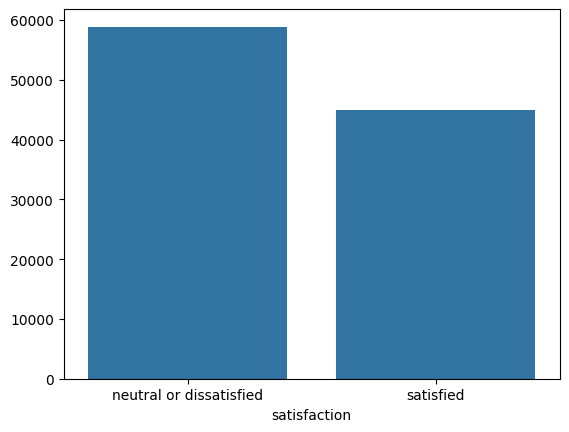

In [7]:
sns.barplot(x=train['satisfaction'].value_counts().index, y = train['satisfaction'].value_counts().values)

# Data preprocessing

## 1. Deleting unuseful columns

Observations

🔘 There are two columns Unnamed: 0 and id,These two columns are of no use in the classification


Decisions

🔘 It is better to delete these two columns

In [8]:
for x in Data:
    x.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [9]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
test.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## 2. Finding and cleaning null values

In [11]:
def calculate_missing_values(data):
    total_missing = data.isnull().sum() 
    percent_missing = round((total_missing / len(data)) * 100,3)  

    missing_data = pd.DataFrame({
        'Total Missing': total_missing,
        'Percent Missing': percent_missing
    })

    missing_data = missing_data.sort_values(by='Percent Missing', ascending=False)
    return missing_data

In [12]:
calculate_missing_values(train)

,Total Missing,Percent Missing
Arrival Delay in Minutes,310,0.298
Gender,0,0.000
Seat comfort,0,0.000
Departure Delay in Minutes,0,0.000
Cleanliness,0,0.000
Inflight service,0,0.000
Checkin service,0,0.000
Baggage handling,0,0.000
Leg room service,0,0.000
On-board service,0,0.000


In [13]:
calculate_missing_values(test)

,Total Missing,Percent Missing
Arrival Delay in Minutes,83,0.32
Gender,0,0.00
Seat comfort,0,0.00
Departure Delay in Minutes,0,0.00
Cleanliness,0,0.00
Inflight service,0,0.00
Checkin service,0,0.00
Baggage handling,0,0.00
Leg room service,0,0.00
On-board service,0,0.00


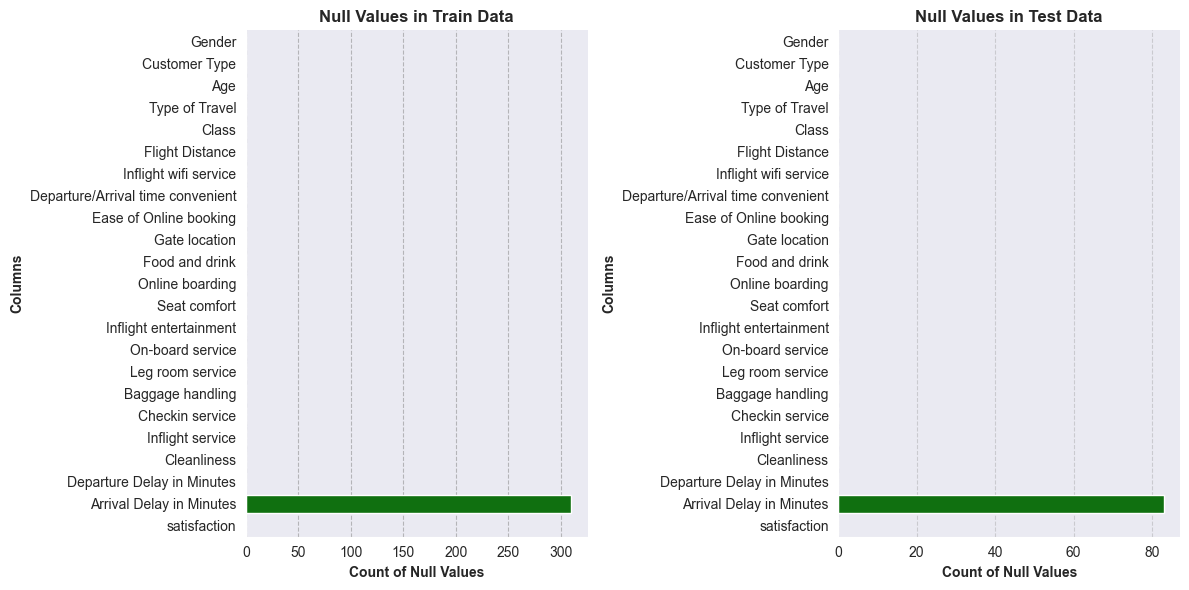

In [14]:
sns.set_style("darkgrid")


train_null_counts = train.isnull().sum()
test_null_counts = test.isnull().sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=train_null_counts, y=train_null_counts.index, ax=axes[0], color='green')
axes[0].set_title('Null Values in Train Data', fontweight='bold')
axes[0].set_xlabel('Count of Null Values', fontweight='bold')
axes[0].set_ylabel('Columns', fontweight='bold')
axes[0].grid(axis='x', linestyle='--', color='gray', alpha=0.5)
sns.despine(ax=axes[0])

sns.barplot(x=test_null_counts, y=test_null_counts.index, ax=axes[1], color='green')
axes[1].set_title('Null Values in Test Data', fontweight='bold')
axes[1].set_xlabel('Count of Null Values', fontweight='bold')
axes[1].set_ylabel('Columns', fontweight='bold')
axes[1].grid(axis='x', linestyle='--', color='gray', alpha=0.3)
sns.despine(ax=axes[1])

plt.tight_layout()

plt.show()

Observations

🔘 Arrival Delay in Minutes column contain null values.

For training data 310 null values ~ (0.298%)

For testing data 83 null values ~ (0.32%)


Decisions

🔘 Drop Nan values in Arrival Delay in Minutes column

In [15]:
train.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [16]:
test.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [17]:
train['Arrival Delay in Minutes'].isnull().any()

False

In [18]:
test['Arrival Delay in Minutes'].isnull().any()

False

## 3. Delete duplicate data

In [19]:
for data , name in zip(Data,data_names):
   print(f'There is {data.duplicated().sum()} duplicated data in {name}')

There is 0 duplicated data in training data
There is 0 duplicated data in testing data


Observations

🔘 There is no duplicate data in both training and testing data

## 4. Handling Outliers

In [20]:
def calculate_outliers_percentage(df):
    df = df.apply(pd.to_numeric, errors='coerce')

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = ((df < lower_bound) | (df > upper_bound)).sum()

    pct_outliers = round(num_outliers / len(df) * 100 , 4)

    return pct_outliers

In [21]:
outliers_train = pd.DataFrame(calculate_outliers_percentage(train), columns=['% Outliers'])
outliers_train.index.name = 'Column Name'
outliers_train.reset_index(inplace=True)
outliers_train

,Column Name,% Outliers
0,Gender,0.0000
1,Customer Type,0.0000
2,Age,0.0000
3,Type of Travel,0.0000
4,Class,0.0000
5,Flight Distance,2.2077
6,Inflight wifi service,0.0000
7,Departure/Arrival time convenient,0.0000
8,Ease of Online booking,0.0000
9,Gate location,0.0000


In [22]:
outliers_test = pd.DataFrame(calculate_outliers_percentage(test), columns=['% Outliers'])
outliers_test.index.name = 'Column Name'
outliers_test.reset_index(inplace=True)
outliers_test

,Column Name,% Outliers
0,Gender,0.0000
1,Customer Type,0.0000
2,Age,0.0000
3,Type of Travel,0.0000
4,Class,0.0000
5,Flight Distance,2.2400
6,Inflight wifi service,0.0000
7,Departure/Arrival time convenient,0.0000
8,Ease of Online booking,0.0000
9,Gate location,0.0000


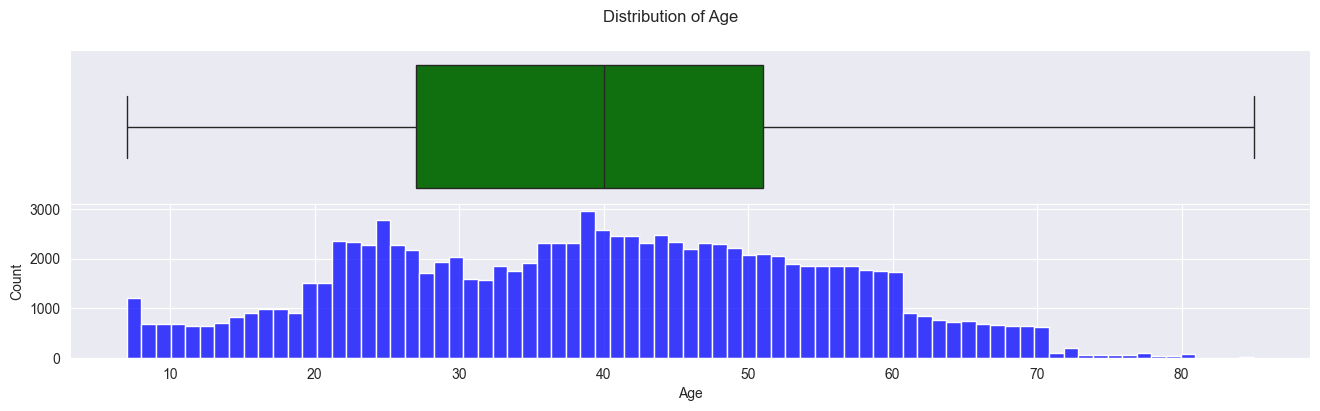

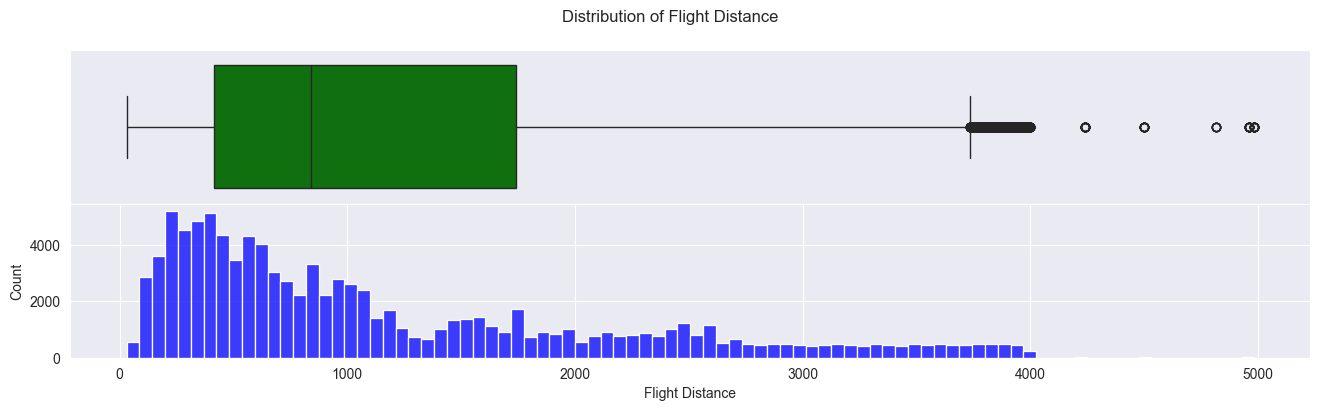

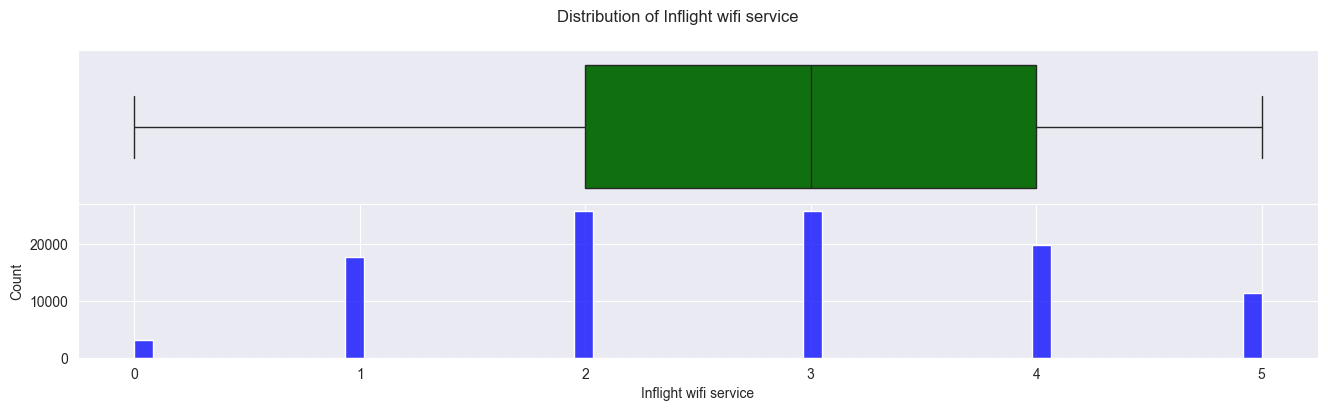

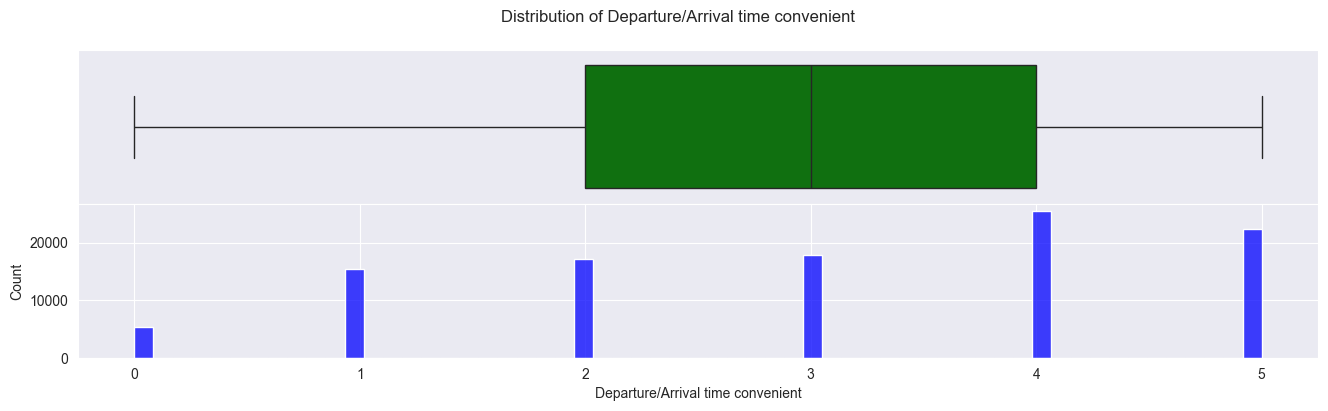

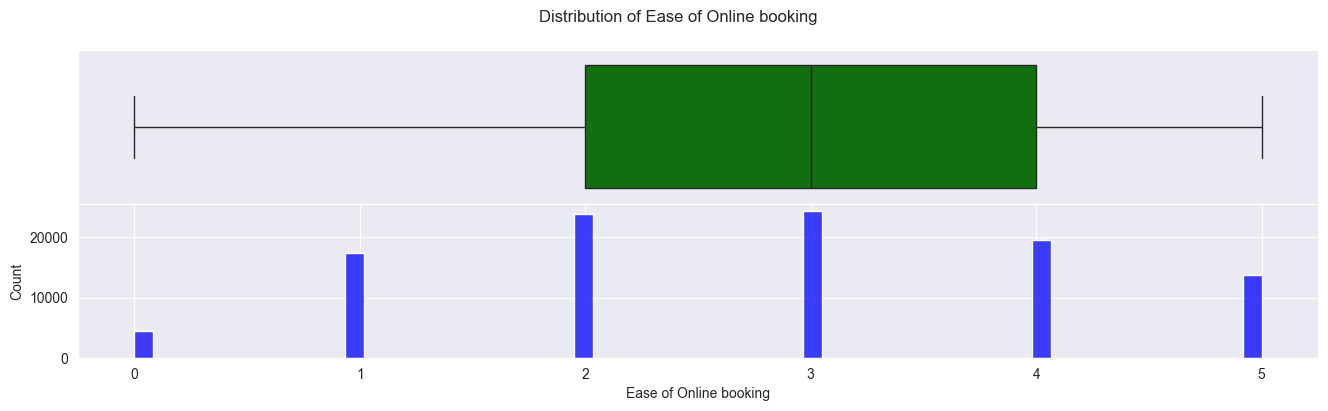

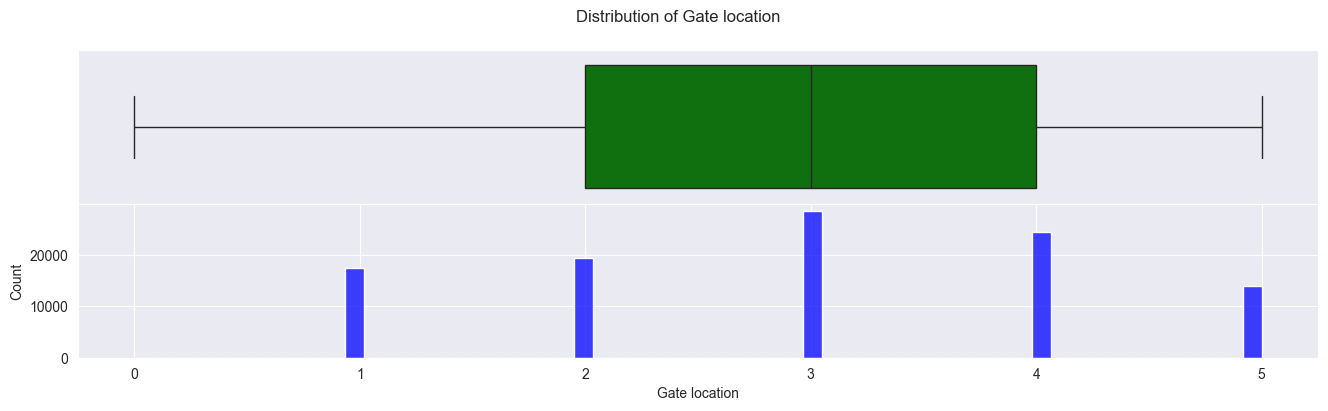

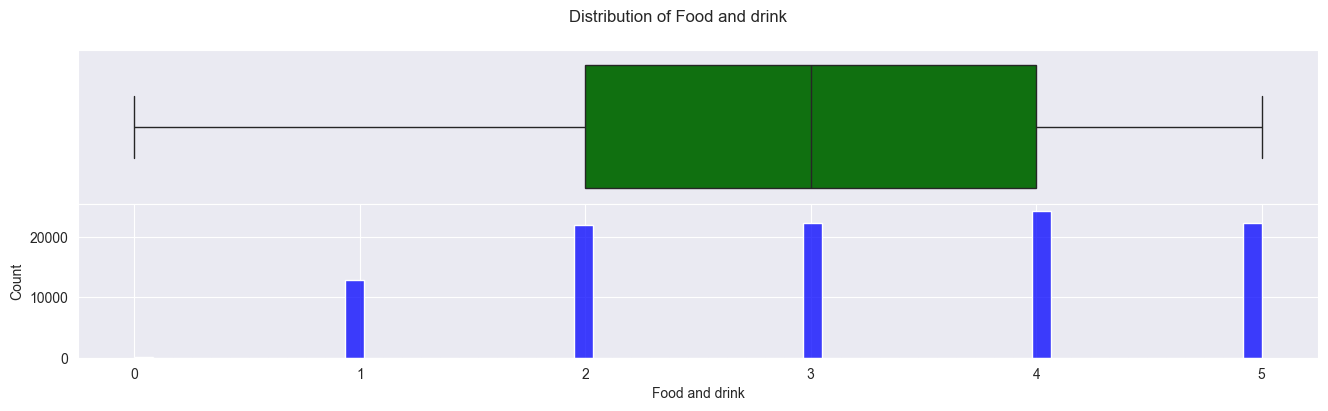

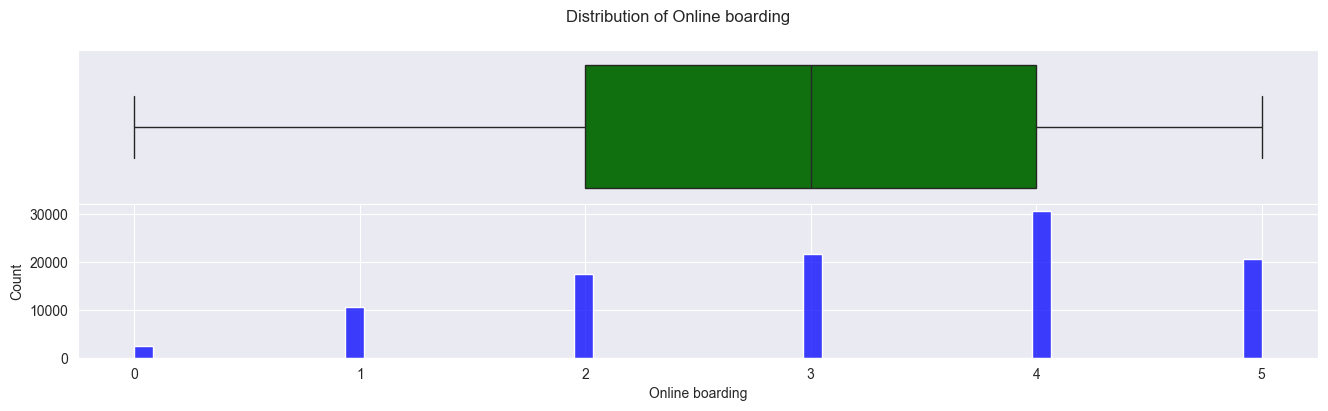

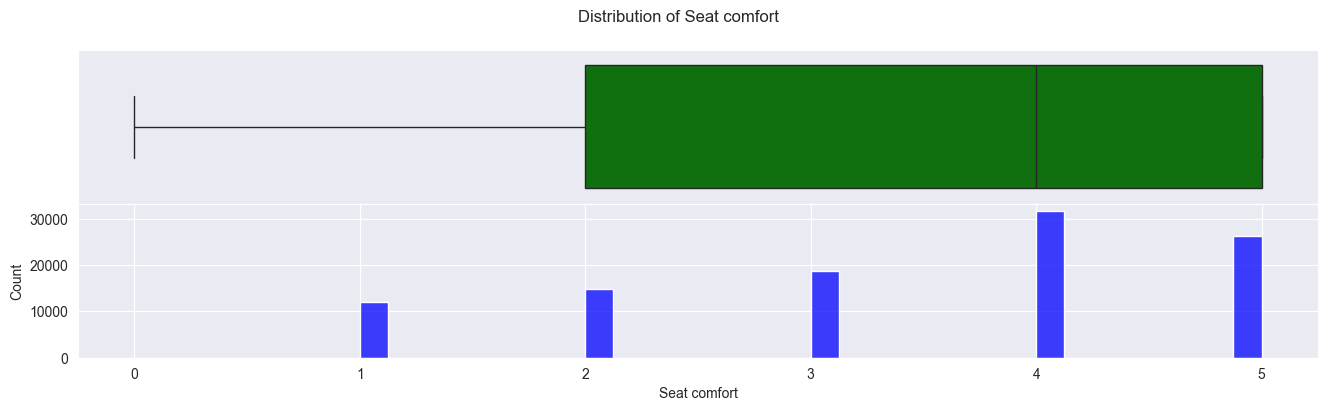

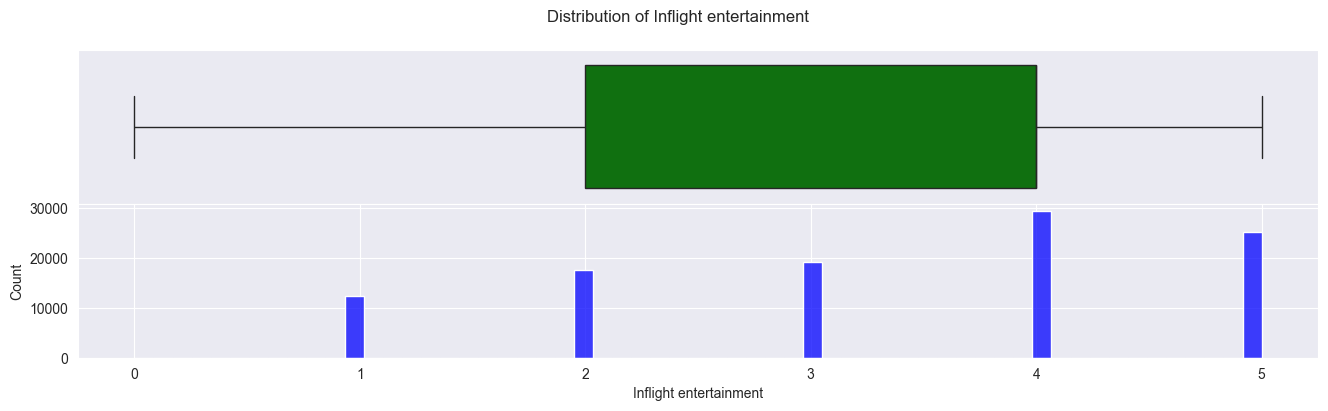

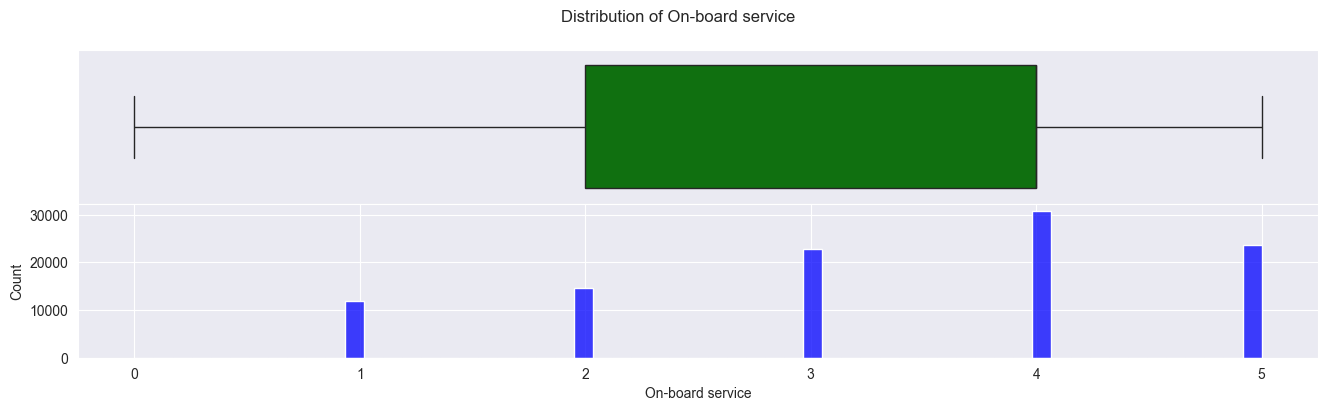

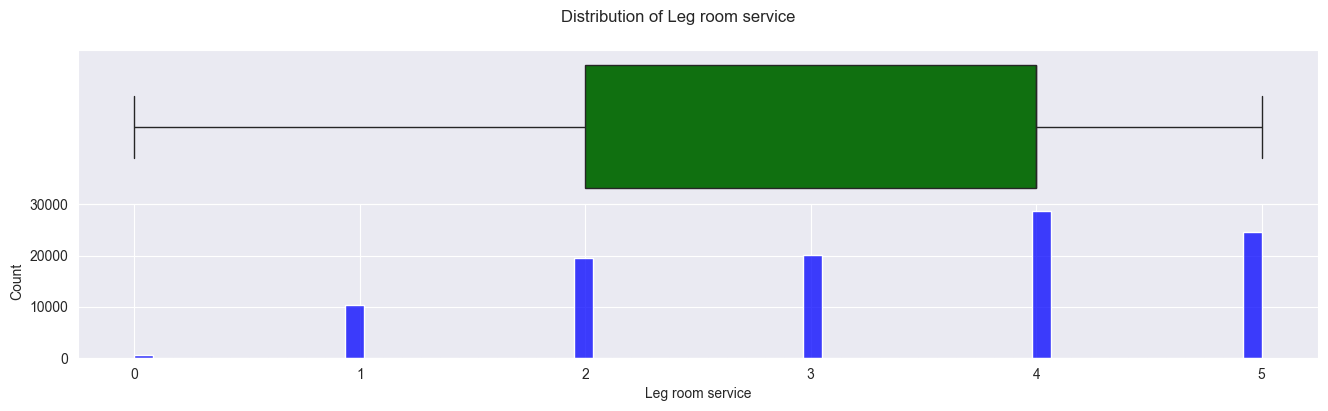

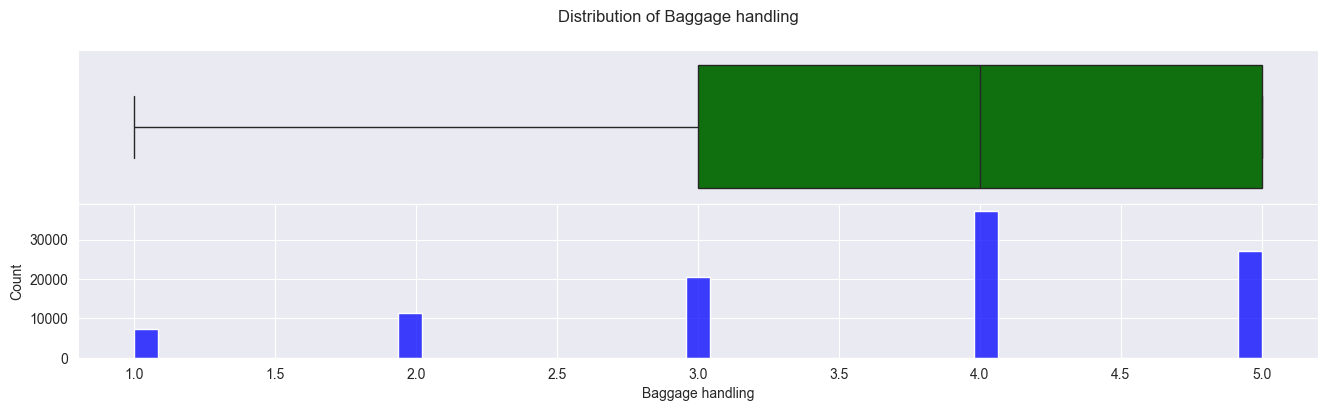

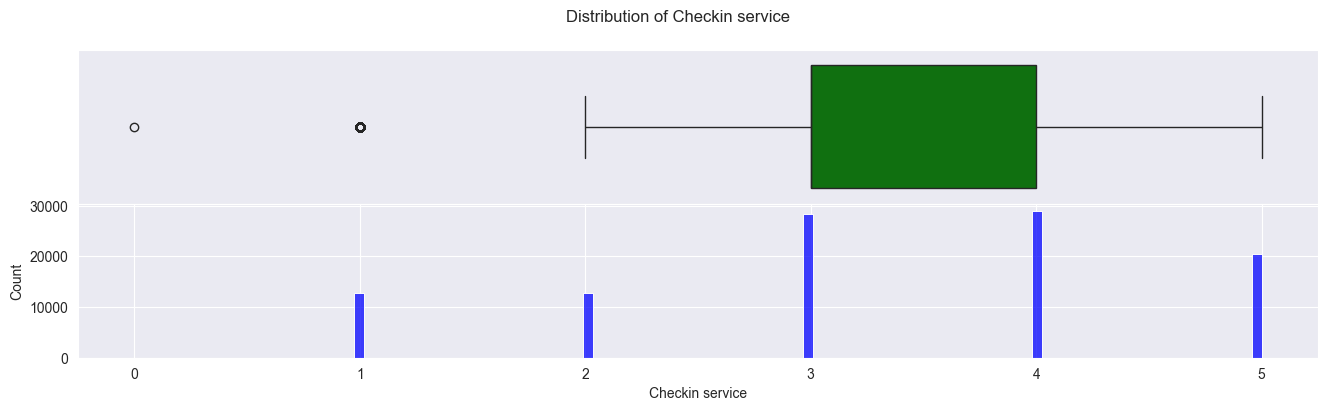

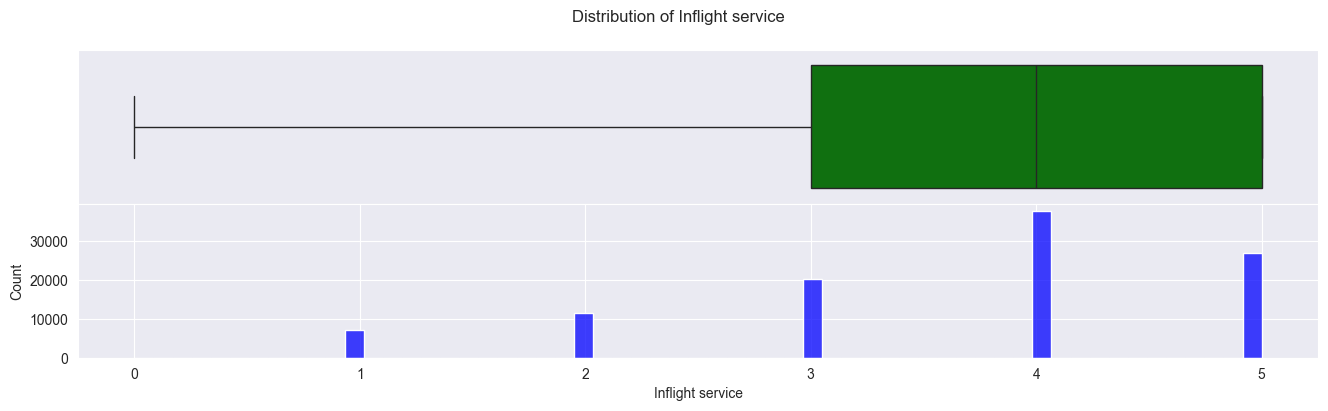

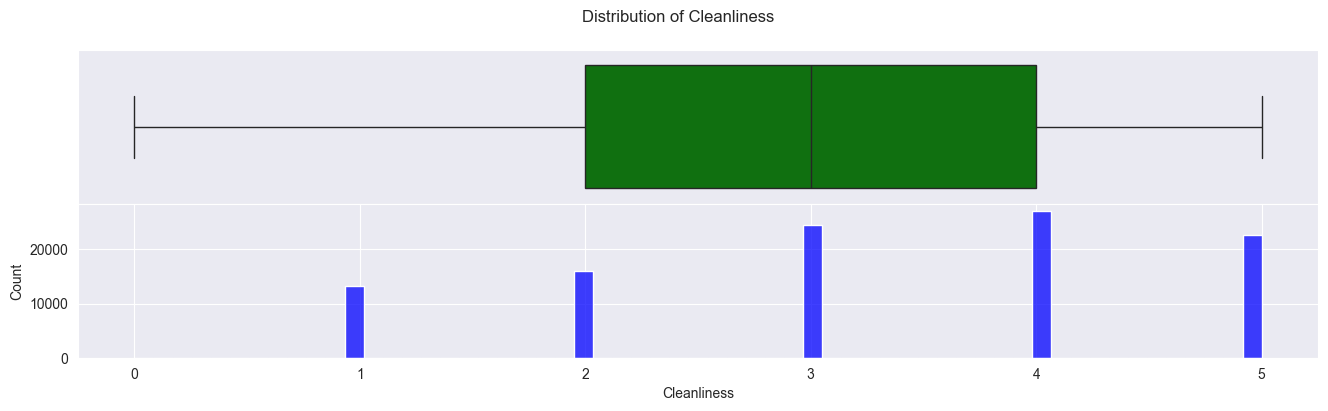

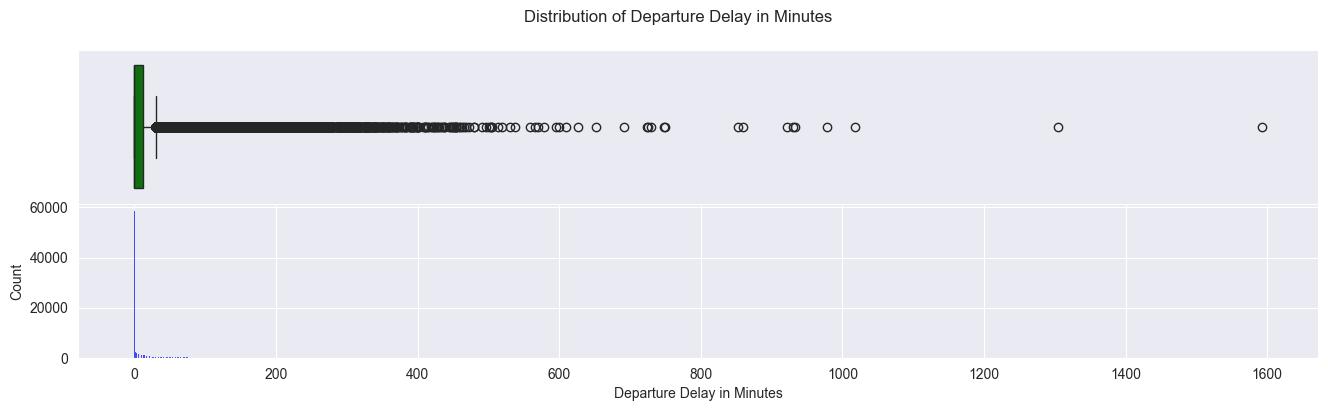

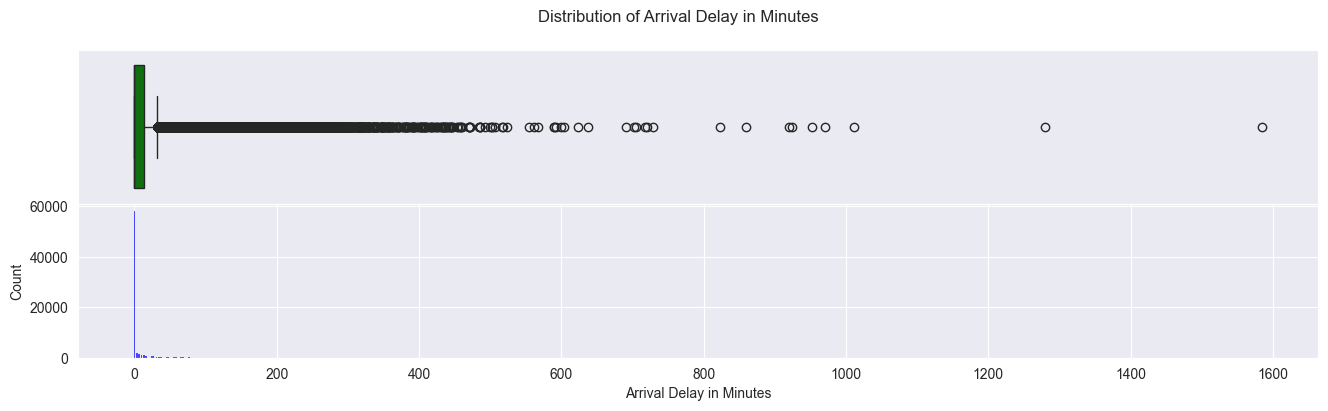

In [23]:
numerical = train.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
    plt.suptitle(f"Distribution of {col}")
    sns.boxplot(data=train, x=col, ax=ax1, color="Green")
    ax1.set_xlabel(None)
    ax1.get_xaxis().set_ticks([])
    sns.histplot(data=train, x=col, ax=ax2, color="Blue")
    plt.subplots_adjust(hspace=0)
    print("\n")
    plt.show()

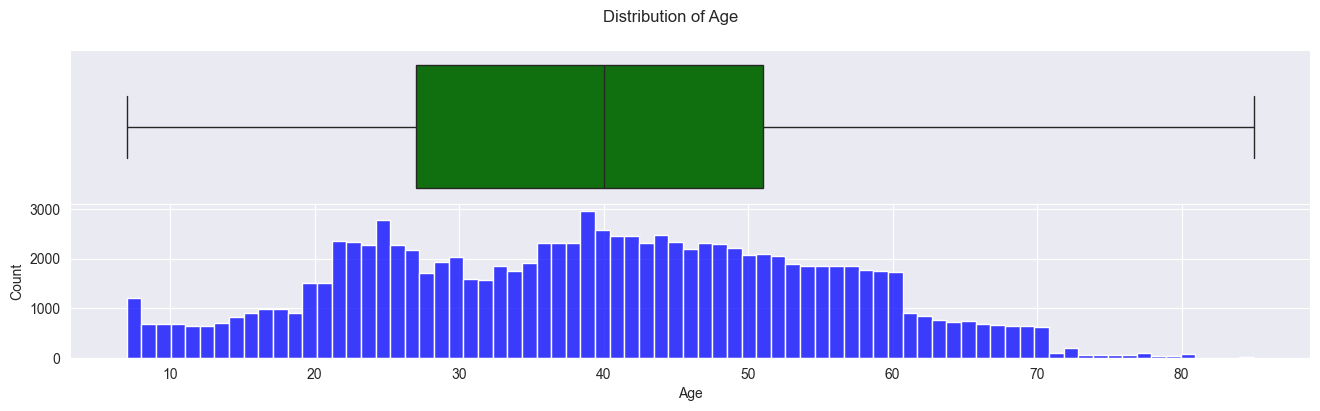

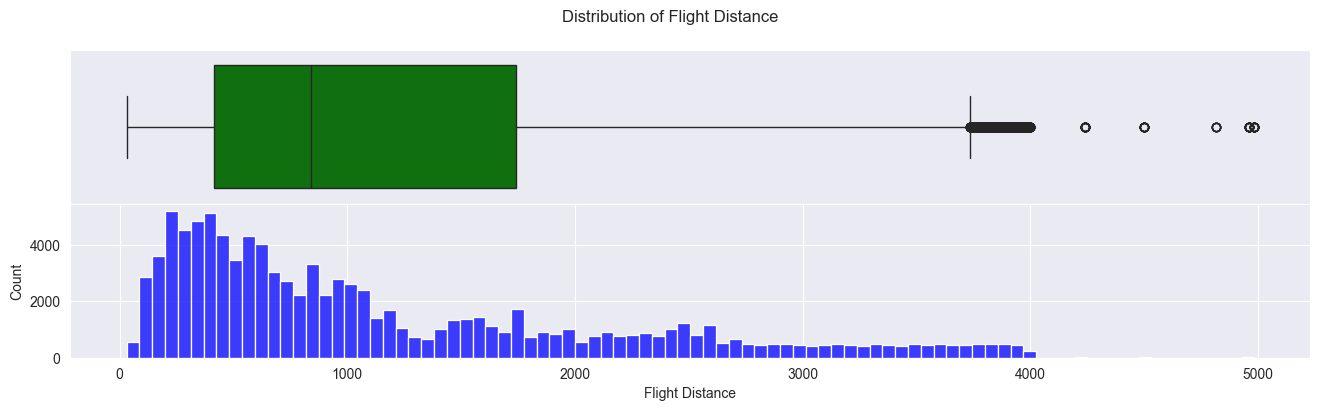

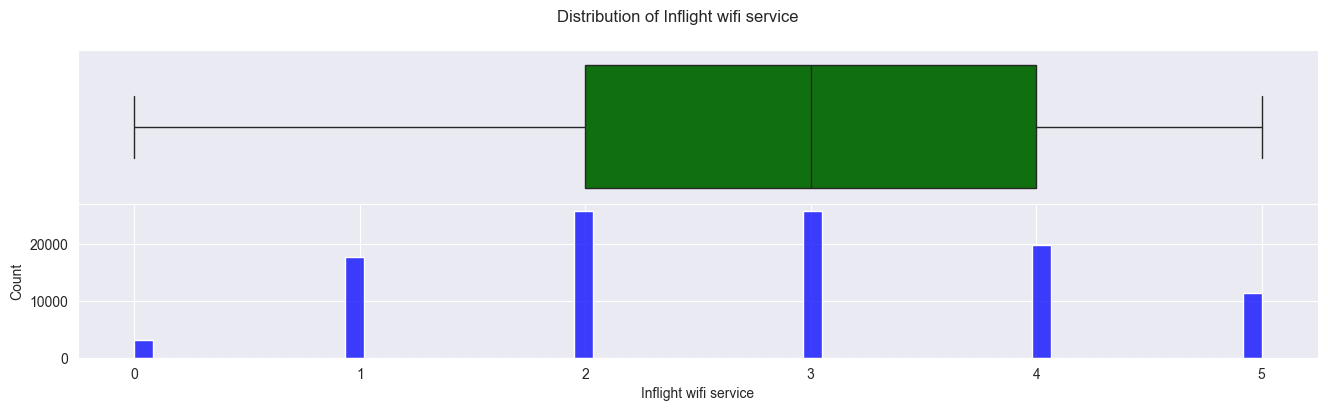

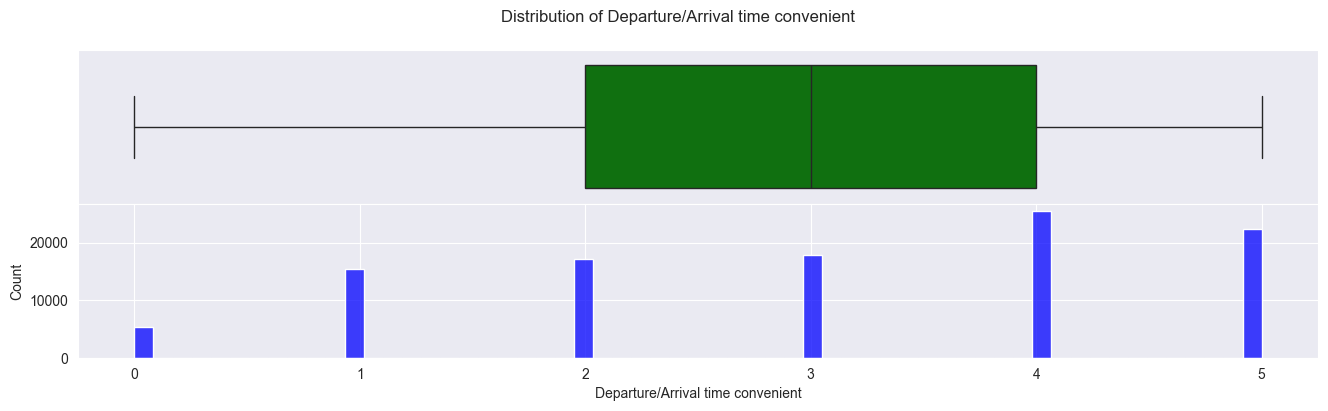

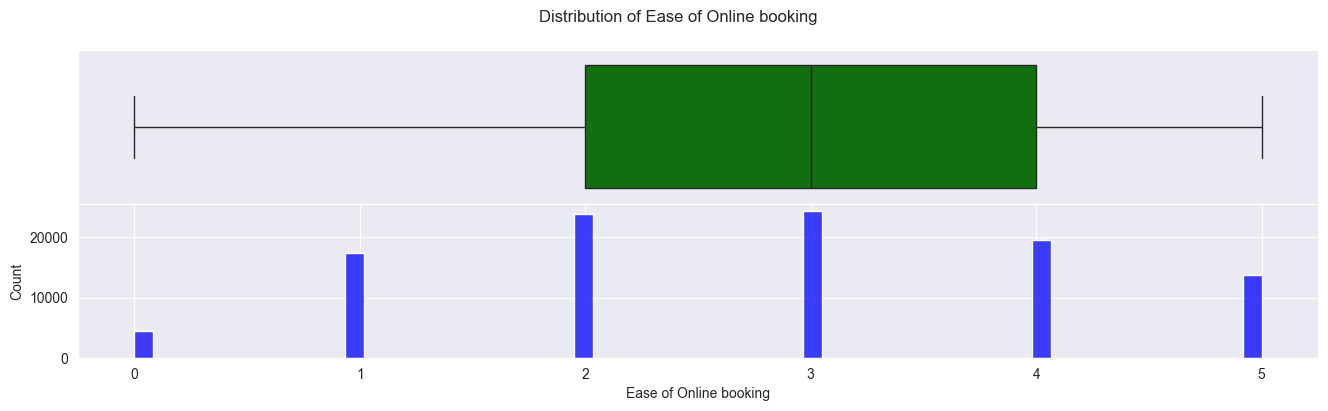

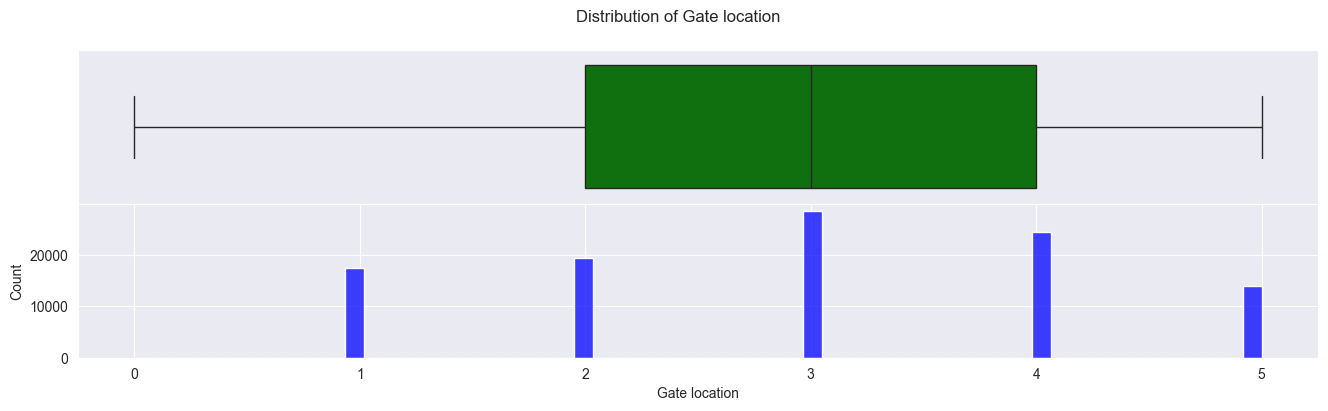

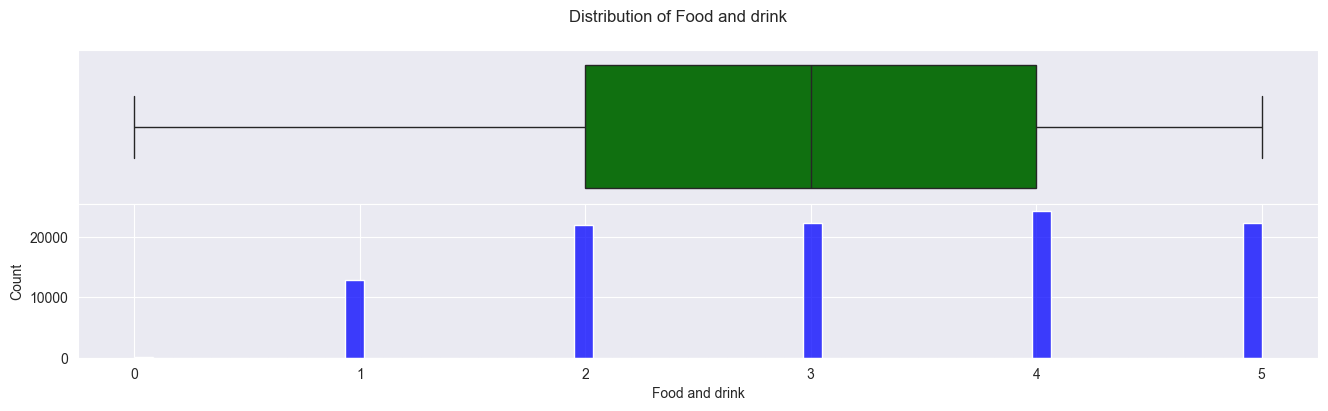

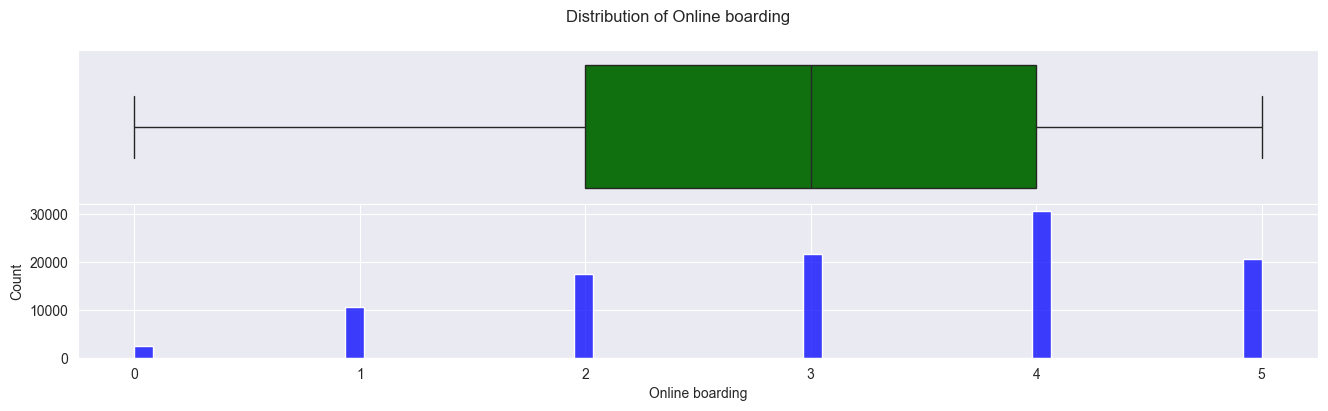

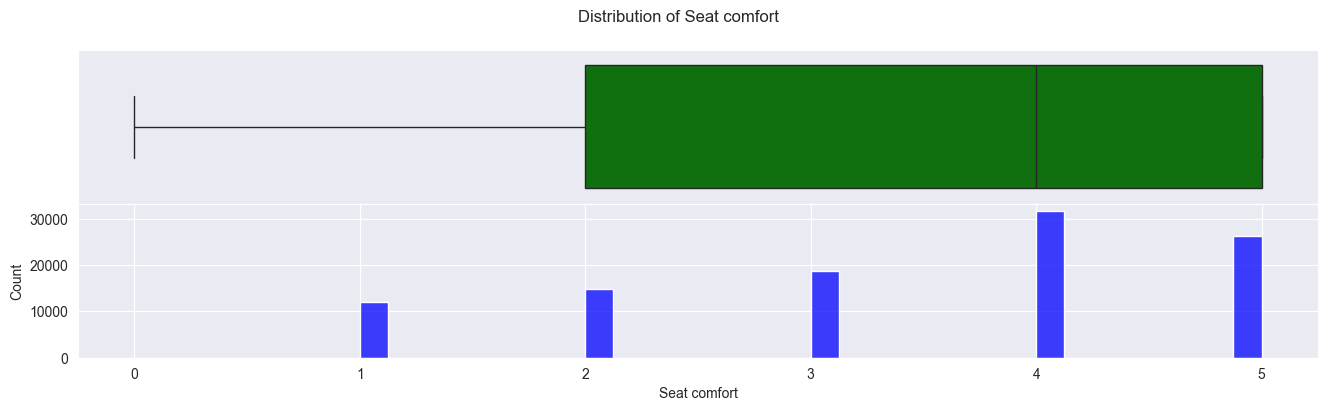

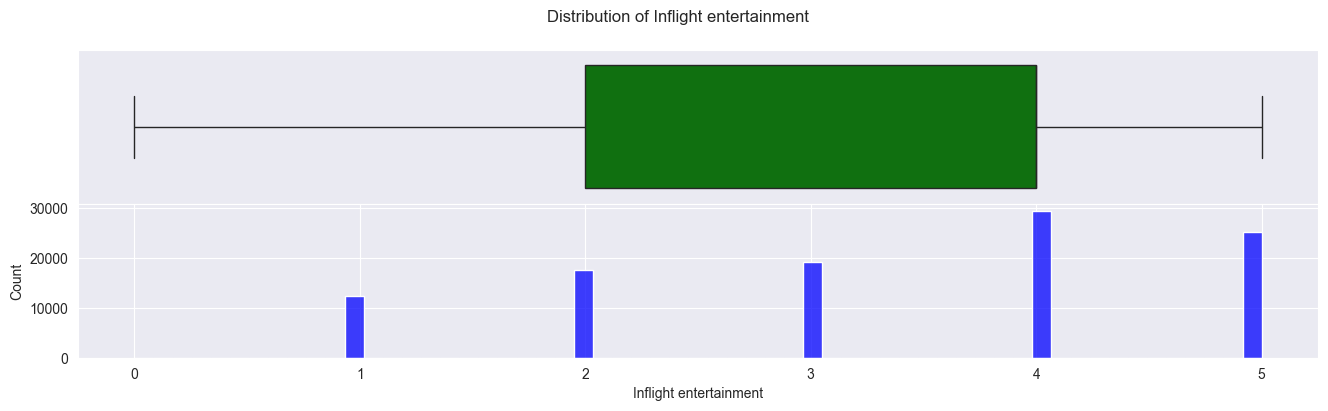

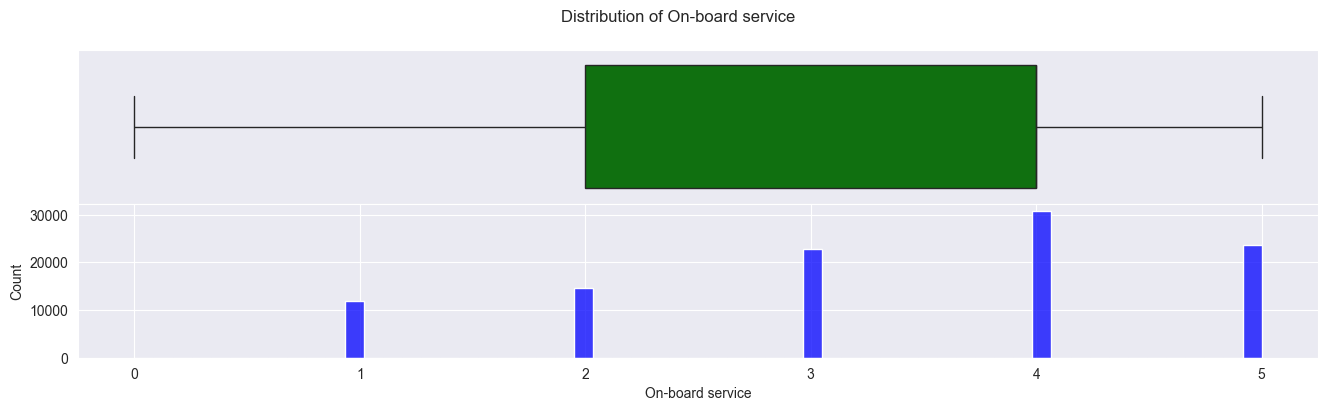

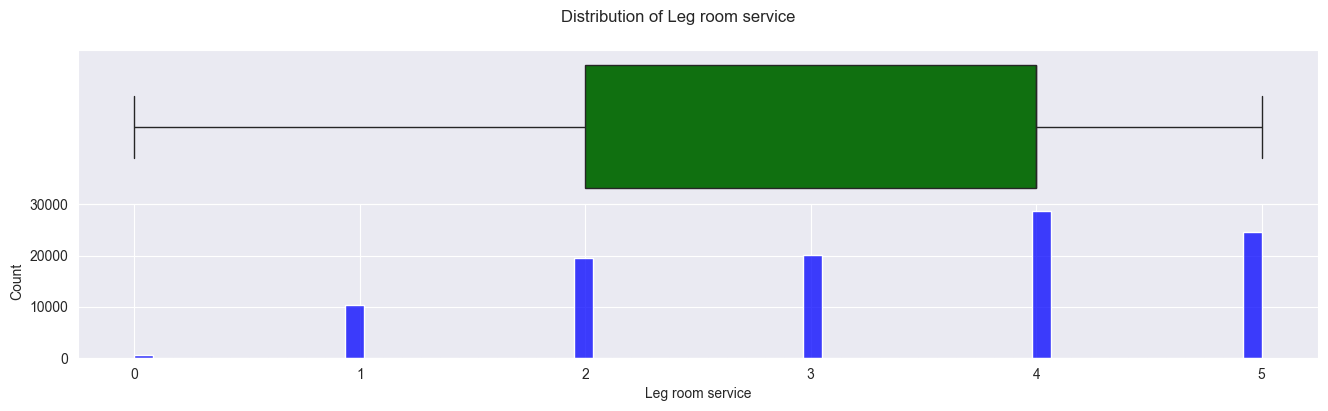

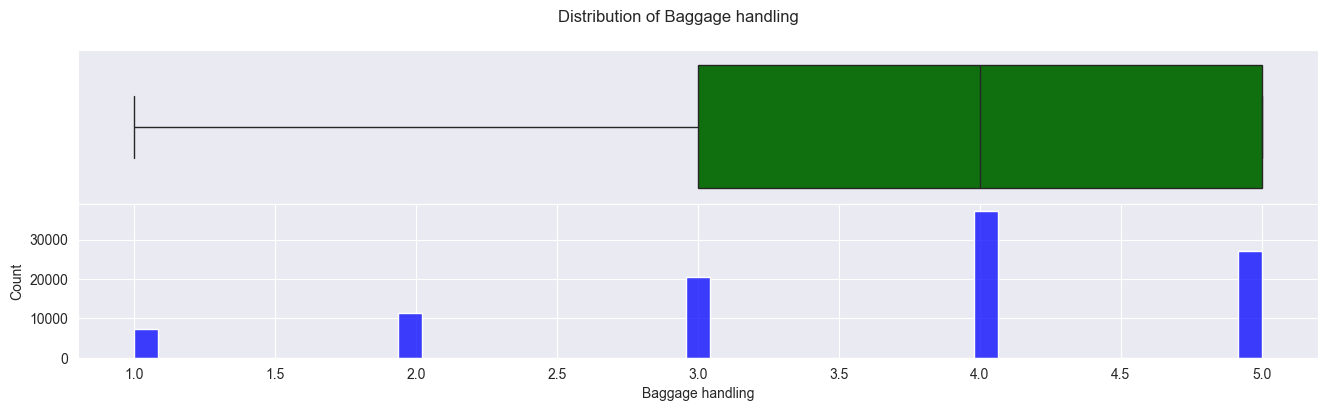

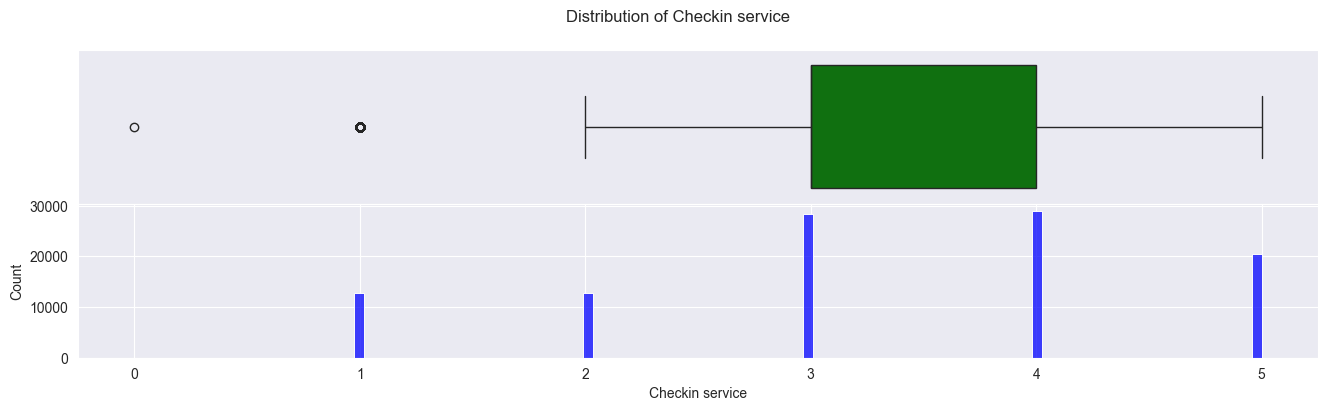

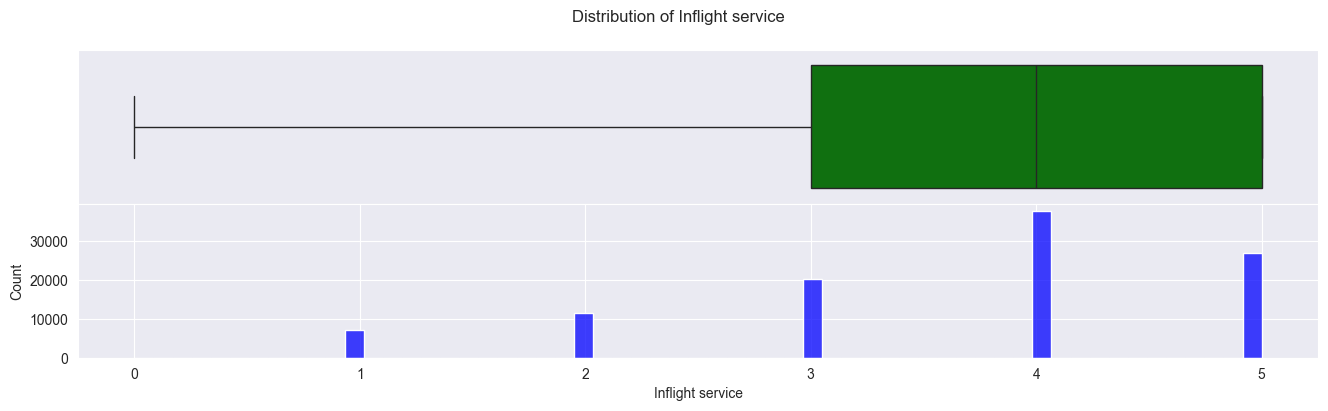

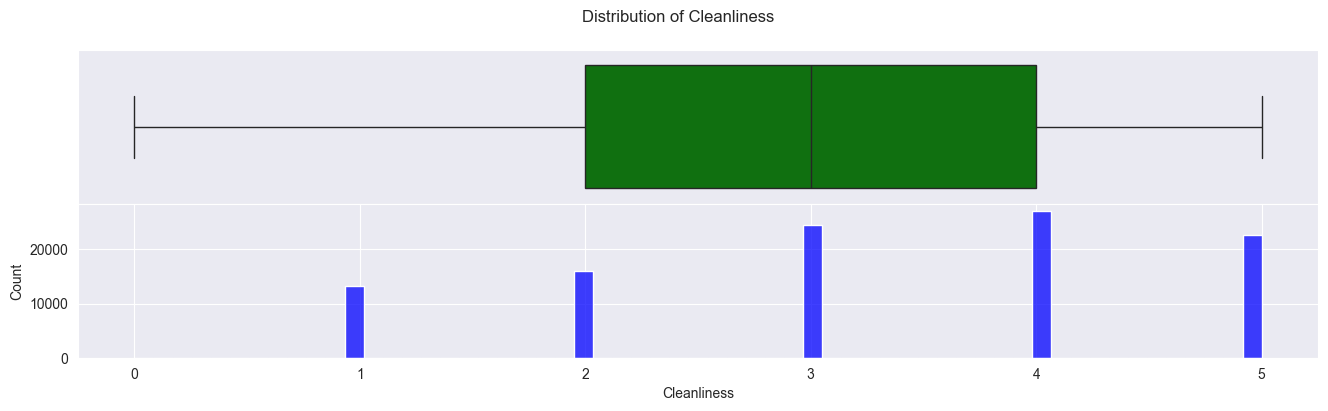

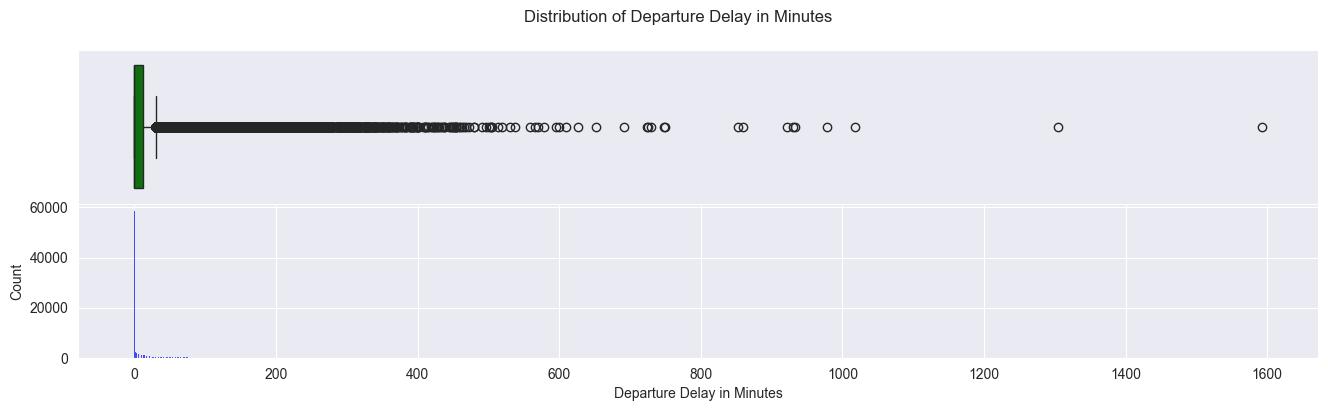

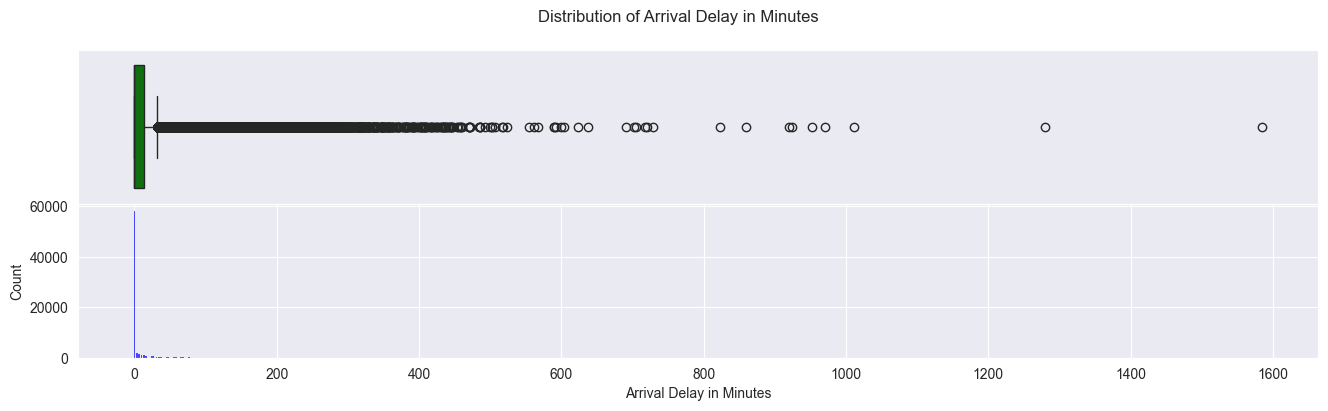

In [24]:
numerical = test.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
    plt.suptitle(f"Distribution of {col}")
    sns.boxplot(data=train, x=col, ax=ax1, color="Green")
    ax1.set_xlabel(None)
    ax1.get_xaxis().set_ticks([])
    sns.histplot(data=train, x=col, ax=ax2, color="Blue")
    plt.subplots_adjust(hspace=0)
    print("\n")
    plt.show()

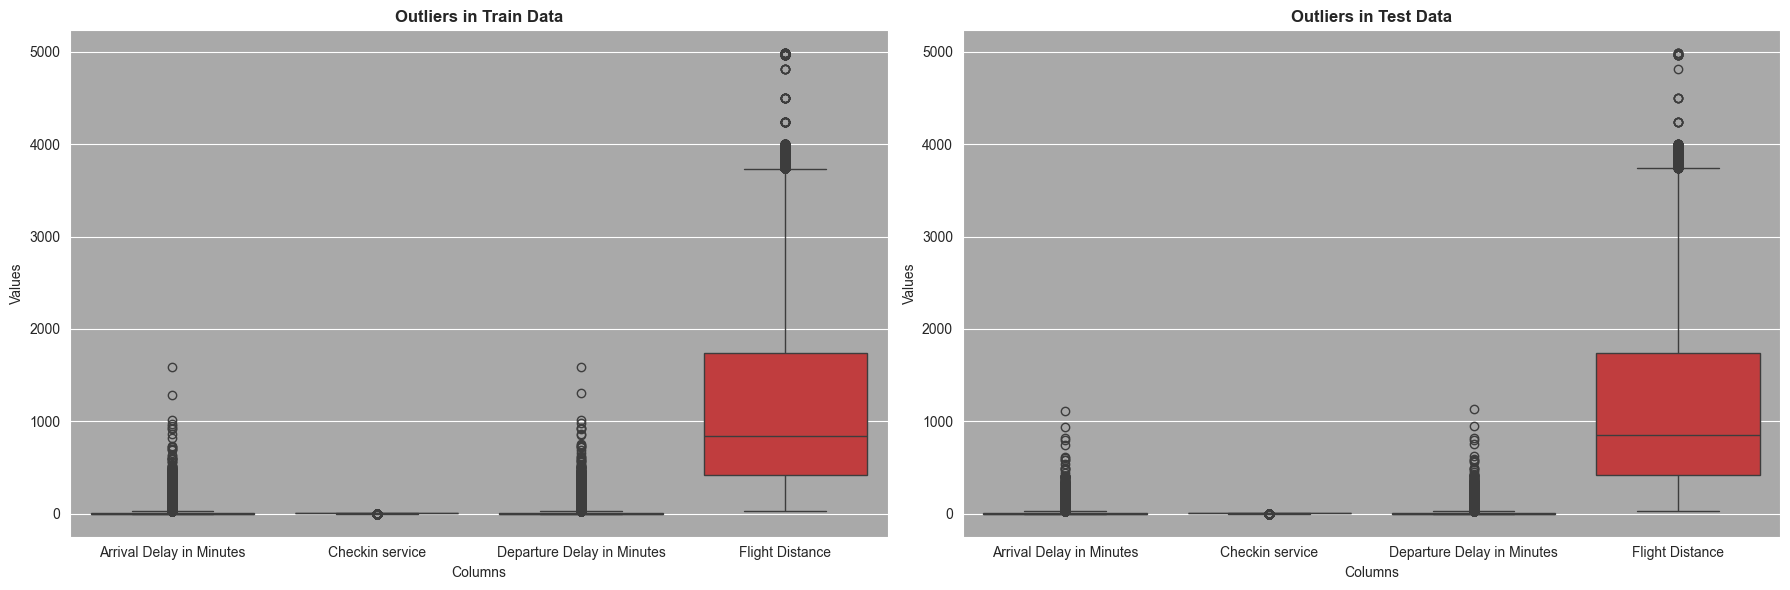

In [25]:
columns_to_visualize = ['Arrival Delay in Minutes', 'Checkin service', 'Departure Delay in Minutes', 'Flight Distance']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.boxplot(data=train[columns_to_visualize], ax=axes[0])
axes[0].set_title('Outliers in Train Data',fontweight='bold')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Values')
axes[0].set_facecolor('darkgray')

sns.boxplot(data=test[columns_to_visualize], ax=axes[1])
axes[1].set_title('Outliers in Test Data',fontweight='bold')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Values')
axes[1].set_facecolor('darkgray')

plt.tight_layout()

plt.show()

Observations 

There are outliers in Train data. In
'Arrival Delay in Minutes' ~ 13.42%
'Checkin service' ~ 12.40%
'Departure Delay in Minutes'~ 13.92%
'Flight Distance' ~ 2.20%

There are outliers in Test data. In
'Arrival Delay in Minutes' ~ 13.62%
'Checkin service' ~ 12.38%
'Departure Delay in Minutes' ~ 13.73%
'Flight Distance' ~ 2.24%

Decisions 

🔘 First drop outliers in 'Flight Distance' column in train and test data

🔘 Second let's impute outliers in 'Checkin service' columns

🔘 Third let's impute outliers in 'Departure Delay in Minutes' column with KNN Algorithm and don't care about outliers in 'Arrival Delay in Minutes' it will be droped

In [26]:
# First drop outliers in 'Flight Distance' column in train and test data
def Outliers(df,col):
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any(axis=1)]
    print("Number of rows before removing outliers:", len(df))
    print("Number of rows after removing outliers:", len(df_clean))
    return df_clean
columns = ['Flight Distance']

In [27]:
#REMOVE OUTLIERS IN TRAIN DATA
train = Outliers(train,columns)

Number of rows before removing outliers: 103594
Number of rows after removing outliers: 101307


That means 2291 row was removed ~ 2.20% of total rows

In [28]:
#REMOVE OUTLIERS IN TEST DATA
test = Outliers(test,columns)

Number of rows before removing outliers: 25893
Number of rows after removing outliers: 25313


That means 584 row was removed ~ 2.24% of total rows

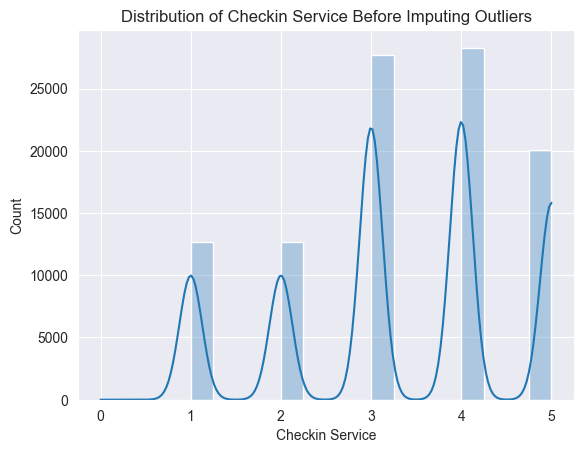

In [29]:
# Second impute 'Checkin service' column with Median imputation
sns.set_style("darkgrid")

sns.histplot(data=train, x='Checkin service',bins=20,alpha= 0.3 , kde=True)

plt.title('Distribution of Checkin Service Before Imputing Outliers')
plt.xlabel('Checkin Service')
plt.ylabel('Count')

plt.show()

In [30]:
median_value_train = train['Checkin service'].median()
median_value_test = test['Checkin service'].median()

In [31]:
Q1 = train['Checkin service'].quantile(0.25)
Q3 = train['Checkin service'].quantile(0.75)

lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)
# Impute outliers in train data with median value
train.loc[(train['Checkin service'] < lower_bound) | (train['Checkin service'] > upper_bound), 'Checkin service'] = median_value_train

In [32]:
Q1 = test['Checkin service'].quantile(0.25)
Q3 = test['Checkin service'].quantile(0.75)

lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)
# Impute outliers in test data with median value
test.loc[(test['Checkin service'] < lower_bound) | (test['Checkin service'] > upper_bound), 'Checkin service'] = median_value_test

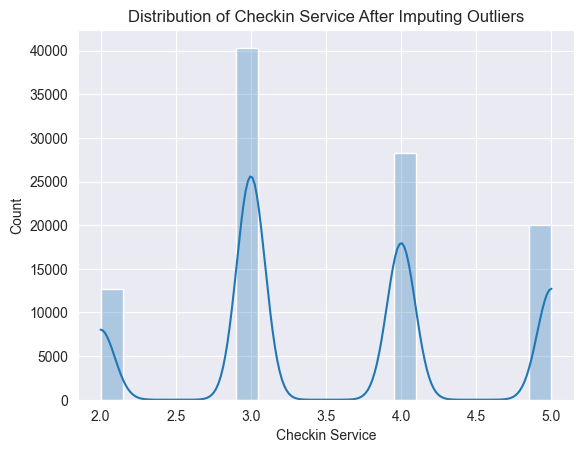

In [33]:
sns.set_style("darkgrid")

sns.histplot(data=train, x='Checkin service',bins=20,alpha= 0.3 , kde=True)

plt.title('Distribution of Checkin Service After Imputing Outliers')
plt.xlabel('Checkin Service')
plt.ylabel('Count')

plt.show()

In [34]:
# Third let's handling outliers in 'Departure Delay in Minutes' column
column_with_outliers = ['Departure Delay in Minutes']

In [35]:
# FOR TRAIN DATA
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(train[column_with_outliers])
train.loc[:, column_with_outliers] = imputed_values

In [36]:
# FOR TEST DATA
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(test[column_with_outliers])
test.loc[:, column_with_outliers] = imputed_values

## 5. Encoding Target Column

In [37]:
le = LabelEncoder()
col_encoded = le.fit_transform(train['satisfaction'])
train.loc[:, 'satisfaction'] = col_encoded
train['satisfaction'].unique()
train.head()

Column Name,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,3,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,3,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


## 6. Unnecessary Features

Text(0.5, 1.0, 'Data correlations')

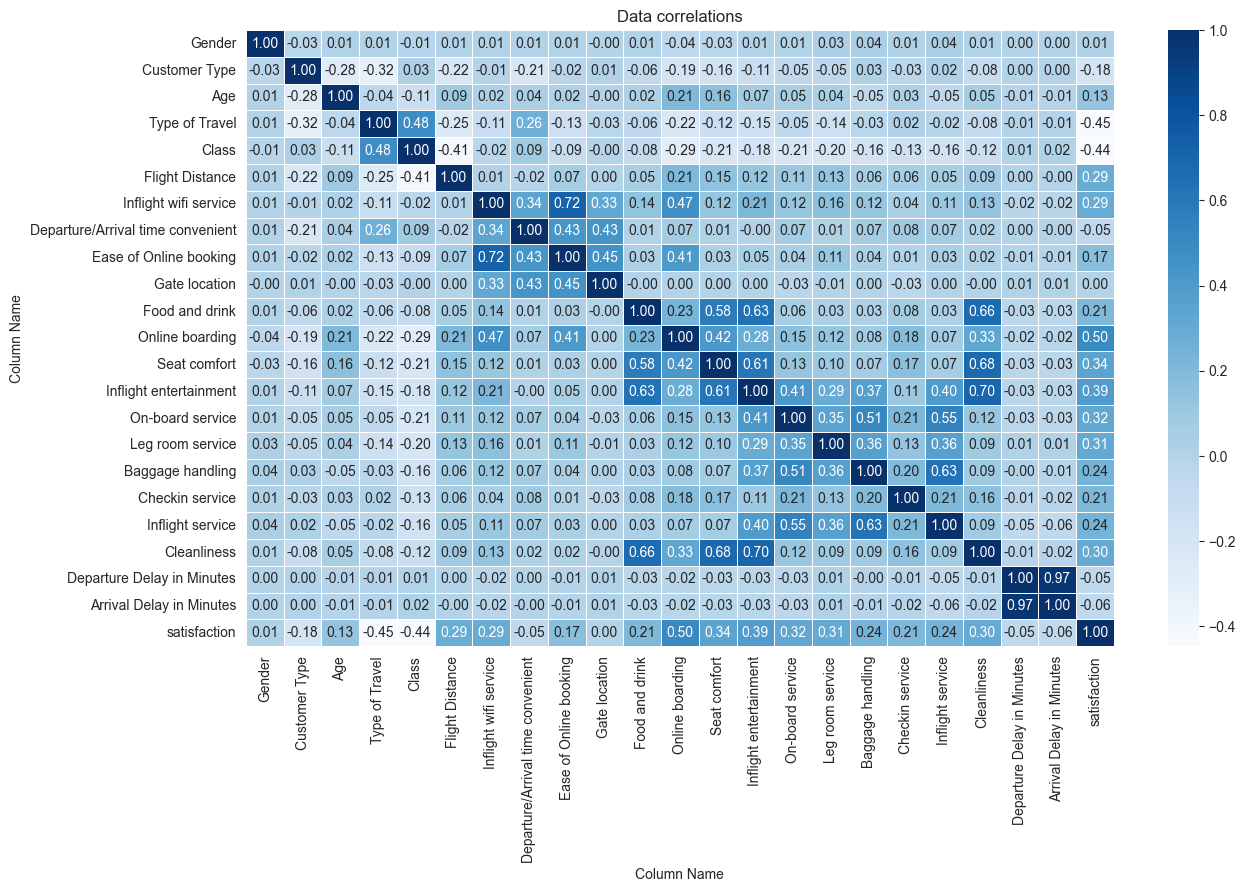

In [38]:
# Create a copy of the dataset
encoded_train = train.copy()

for column in encoded_train.columns:
    if encoded_train[column].dtype == 'object':
        label_encoder = LabelEncoder()
        encoded_train[column] = label_encoder.fit_transform(encoded_train[column])

correlation = encoded_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

In [39]:
encoded_train.corr()

Column Name,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Column Name,,,,,,,,,,,,,,,,,,,,,,,
Gender,1.000000,-0.032070,0.009270,0.007020,-0.012986,0.006858,0.009040,0.009222,0.006478,-0.000297,0.005909,-0.043224,-0.027300,0.006390,0.008653,0.033322,0.038367,0.011819,0.039868,0.006210,0.002709,0.000606,0.012513
Customer Type,-0.032070,1.000000,-0.281702,-0.317421,0.033387,-0.216908,-0.007698,-0.210396,-0.018761,0.006452,-0.058787,-0.186901,-0.157853,-0.108049,-0.054616,-0.045420,0.026563,-0.026328,0.024896,-0.082706,0.004436,0.004686,-0.183207
Age,0.009270,-0.281702,1.000000,-0.044953,-0.113498,0.092327,0.018088,0.039170,0.024675,-0.001962,0.023157,0.208032,0.159079,0.074996,0.054470,0.036954,-0.049552,0.027782,-0.052102,0.053207,-0.009731,-0.011525,0.134454
Type of Travel,0.007020,-0.317421,-0.044953,1.000000,0.480199,-0.252208,-0.106612,0.262499,-0.134164,-0.031303,-0.061760,-0.220829,-0.120449,-0.145241,-0.053426,-0.136708,-0.029746,0.016731,-0.020455,-0.076994,-0.005821,-0.005651,-0.446700
Class,-0.012986,0.033387,-0.113498,0.480199,1.000000,-0.411501,-0.023372,0.089815,-0.094240,-0.004437,-0.075243,-0.292534,-0.206294,-0.175213,-0.206811,-0.195257,-0.164304,-0.132628,-0.158363,-0.124093,0.010791,0.015155,-0.444994
Flight Distance,0.006858,-0.216908,0.092327,-0.252208,-0.411501,1.000000,0.007283,-0.016420,0.065959,0.004505,0.054477,0.206670,0.150916,0.120906,0.105129,0.128664,0.060477,0.060708,0.054988,0.089669,0.000916,-0.002979,0.286207
Inflight wifi service,0.009040,-0.007698,0.018088,-0.106612,-0.023372,0.007283,1.000000,0.335370,0.715782,0.325991,0.136232,0.465571,0.123348,0.209364,0.120216,0.159798,0.118710,0.037712,0.108544,0.133703,-0.017751,-0.019343,0.289288
Departure/Arrival time convenient,0.009222,-0.210396,0.039170,0.262499,0.089815,-0.016420,0.335370,1.000000,0.430820,0.434966,0.005834,0.072578,0.012637,-0.004438,0.070273,0.012388,0.073235,0.082727,0.074848,0.015680,0.001150,-0.000589,-0.051525
Ease of Online booking,0.006478,-0.018761,0.024675,-0.134164,-0.094240,0.065959,0.715782,0.430820,1.000000,0.451484,0.032343,0.412261,0.030077,0.046813,0.038295,0.108048,0.038427,0.005138,0.034675,0.016329,-0.006540,-0.008207,0.174769


In [40]:
drop_columns = ['Arrival Delay in Minutes']
train.drop(drop_columns,axis=1,inplace=True)
train.head()

Column Name,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,3,4,1,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,3,4,2,11,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1


In [41]:
test.drop(drop_columns,axis=1,inplace=True)
test.head()

Column Name,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,satisfied


## 7. Data encoding
OneHot Encoding is a process used in data analysis and machine learning to convert categorical variables into numerical format. It creates binary vectors where each category is encoded as a binary feature. In this encoding scheme, each category is represented by a vector of zeros with only one element being 1, known as the "hot" element. This encoding helps in representing categorical data in a way that can be easily understood and processed by machine learning algorithms

In [42]:
encoder = OneHotEncoder()
columns_to_encode = ['Gender','Customer Type', 'Type of Travel', 'Class']

In [43]:
# FOR TRAIN DATA
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(train[columns_to_encode])

encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

train.drop(columns_to_encode, axis=1, inplace=True)
train[encoded_column_names] = encoded_columns

train.head()

Column Name,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,3,4,1,1,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,3,4,2,11,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [44]:
#FOR TEST DATA
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(test[columns_to_encode])

encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

test.drop(columns_to_encode, axis=1, inplace=True)
test[encoded_column_names] = encoded_columns

test.head()

Column Name,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,neutral or dissatisfied,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,satisfied,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## 8. Normalization

MinMax scaling, also known as min-max normalization, rescales the range of features to a given range, typically [0, 1].

In [45]:
columns_to_scale = ['Age', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes']

scaler = MinMaxScaler()

# FOR TRAIN DATA
scaled_values = scaler.fit_transform(train[columns_to_scale])
train[columns_to_scale] = scaled_values

aggregated_train = train[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

Column Name,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
mean,0.413966,0.296202,0.545901,0.550750,0.639652,0.647258,0.685891,0.669752,0.675120,0.668582,0.656988,0.516601,0.727462,0.656103,0.009253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,0.423077,0.211066,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.333333,0.800000,0.600000,0.000000
std,0.194372,0.248628,0.265053,0.279322,0.266164,0.270267,0.264395,0.267100,0.257916,0.263351,0.295459,0.314980,0.235305,0.262819,0.023910


In [46]:
# FOR TEST DATA
scaled_values = scaler.fit_transform(test[columns_to_scale])
test[columns_to_scale] = scaled_values

aggregated_train = train[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

Column Name,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
mean,0.413966,0.296202,0.545901,0.550750,0.639652,0.647258,0.685891,0.669752,0.675120,0.668582,0.656988,0.516601,0.727462,0.656103,0.009253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,0.423077,0.211066,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.333333,0.800000,0.600000,0.000000
std,0.194372,0.248628,0.265053,0.279322,0.266164,0.270267,0.264395,0.267100,0.257916,0.263351,0.295459,0.314980,0.235305,0.262819,0.023910


## 9. Data Splitting

In [47]:
X_train = train.drop(["satisfaction"], axis = 1)
y_train = train["satisfaction"].astype('int32')

X_test = test.drop(["satisfaction"], axis = 1)
y_test = test["satisfaction"]

y_test = y_test.replace({"satisfied":1, "neutral or dissatisfied":0})

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

## 10. Imbalanced Data

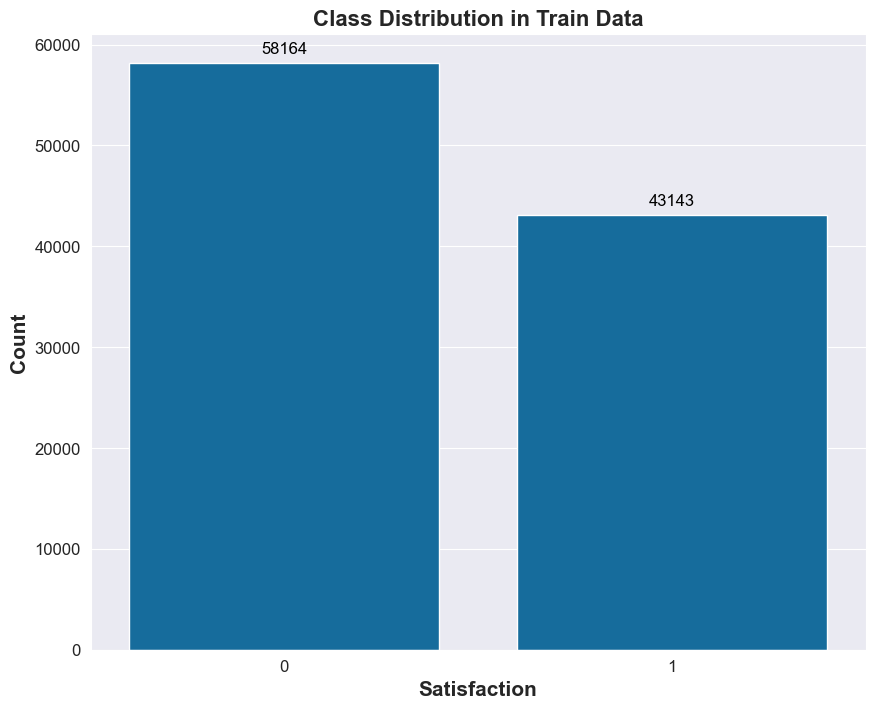

In [48]:
custom_palette = ["#0072B2", "#ADD8E6"]

plt.figure(figsize=(10, 8))

sns.set_palette(custom_palette)
ax = sns.countplot(x='satisfaction', data=train)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')

plt.title('Class Distribution in Train Data', fontweight='bold', fontsize=16)
plt.xlabel('Satisfaction', fontsize=15,fontweight='bold')
plt.ylabel('Count', fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [49]:
# imbalance data
ROS=RandomOverSampler(random_state=42)
# train
train,y_train = ROS.fit_resample(train,y_train)

# Check before and after ===>overSample
from collections import Counter
print("Updata dataset Train: ",Counter(y_train))

Updata dataset Train:  Counter({0: 58164, 1: 58164})


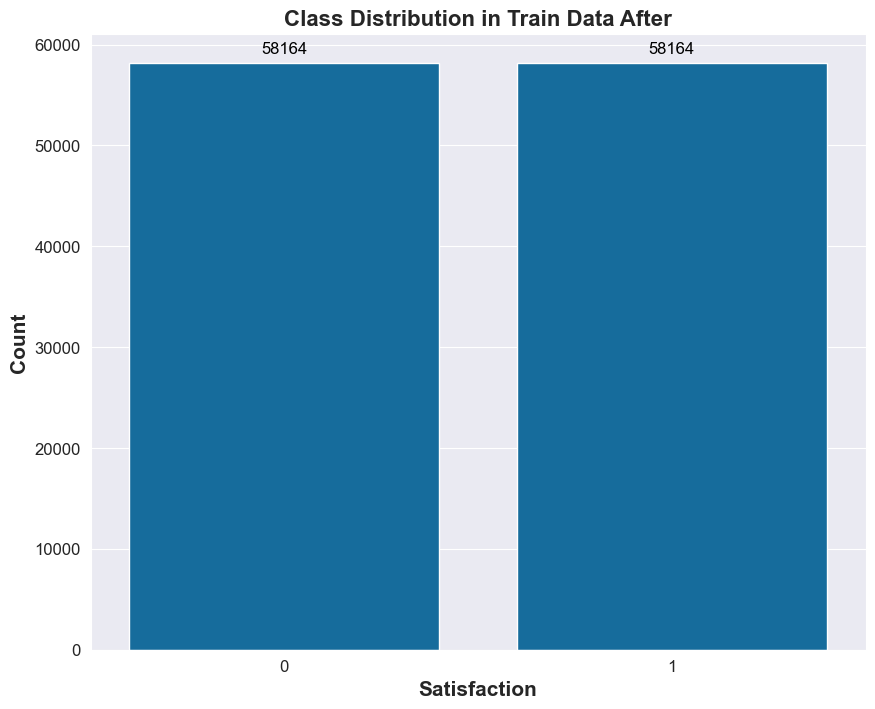

In [50]:
custom_palette = ["#0072B2", "#ADD8E6"]

plt.figure(figsize=(10, 8))

sns.set_palette(custom_palette)
ax = sns.countplot(x='satisfaction', data=train)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')

plt.title('Class Distribution in Train Data After', fontweight='bold', fontsize=16)
plt.xlabel('Satisfaction', fontsize=15,fontweight='bold')
plt.ylabel('Count', fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Building machine learning model and evaluation

In [51]:
def plot_roc_auc(model, X_test, y_test, y_pred=None):
    if hasattr(model, "decision_function"):
        y_pred = model.decision_function(X_test)
    else:
        y_pred = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return fpr, tpr, thresholds

In [52]:
def make_confusion_matrix(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [53]:
X_train = train.drop(["satisfaction"], axis = 1)
y_train = train["satisfaction"].astype('int32')

## Model 1: K-Nearest Neighbors

In [54]:
knn_model = KNeighborsClassifier(weights = 'distance')

In [55]:
accuracy_scores = []
y_val_pred_all = []
y_val_all = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    knn_model.fit(X_train_fold, y_train_fold)
    yknn_val_pred = knn_model.predict(X_val_fold)

    y_val_pred_all.extend(yknn_val_pred)
    y_val_all.extend(y_val_fold)

    accuracy = accuracy_score(y_val_fold, yknn_val_pred)
    accuracy_scores.append(accuracy)

In [56]:
avgknn_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the KNN model using k-fold cross-validation is: {:.2f}%".format(
    avgknn_accuracy * 100))

The average accuracy of the KNN model using k-fold cross-validation is: 93.76%


In [57]:
print(classification_report(y_val_all, y_val_pred_all))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     58164
           1       0.94      0.93      0.94     58164

    accuracy                           0.94    116328
   macro avg       0.94      0.94      0.94    116328
weighted avg       0.94      0.94      0.94    116328



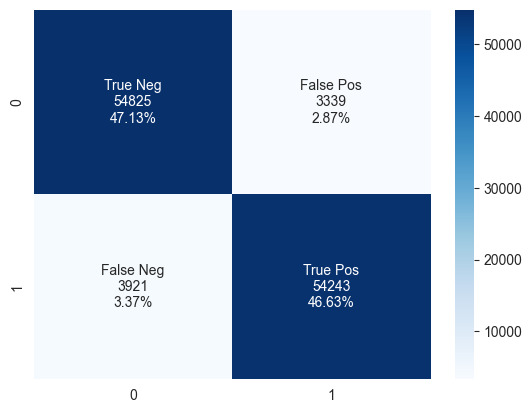

In [58]:
cm = confusion_matrix(y_val_all, y_val_pred_all)
make_confusion_matrix(cm)

In [59]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [60]:
print(classification_report(knn_model.predict(X_test), y_test))
knn_acc_before_feature_selection = accuracy_score(knn_model.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     14878
           1       0.88      0.92      0.90     10435

    accuracy                           0.92     25313
   macro avg       0.91      0.92      0.91     25313
weighted avg       0.92      0.92      0.92     25313



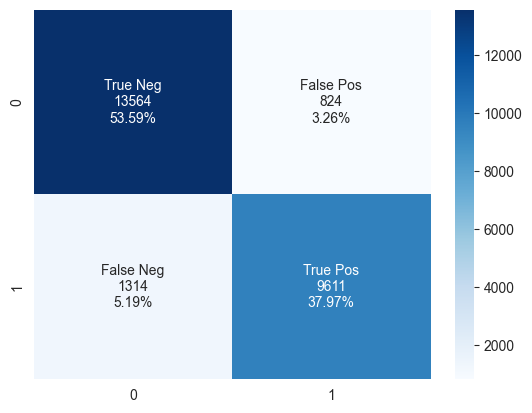

In [61]:
cm = confusion_matrix(y_test, knn_model.predict(X_test))
make_confusion_matrix(cm)

(array([0.        , 0.00910481, 0.00910481, ..., 0.22560467, 0.22595218,
        1.        ]),
 array([0.        , 0.73867277, 0.7387643 , ..., 0.96155606, 0.96155606,
        1.        ]),
 array([       inf, 1.        , 0.95812394, ..., 0.13769091, 0.10891013,
        0.        ]))

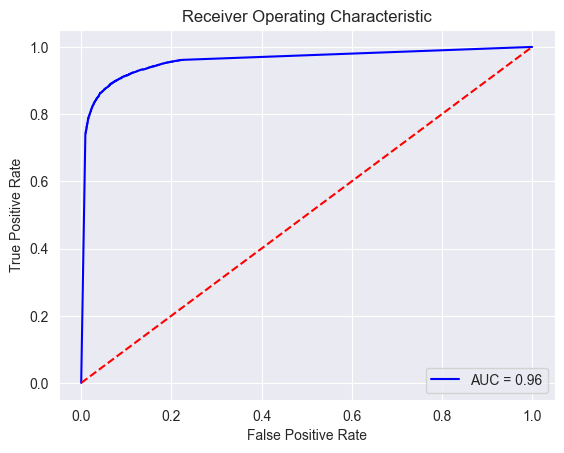

In [62]:
plot_roc_auc(knn_model, X_test, y_test, y_pred=None)

## Model 2: Logistic Regression

In [63]:
lr_model = LogisticRegression()

In [64]:
accuracy_scores = []
y_val_pred_all = []
y_val_all = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    lr_model.fit(X_train_fold, y_train_fold)
    ylr_val_pred = lr_model.predict(X_val_fold)

    y_val_pred_all.extend(ylr_val_pred)
    y_val_all.extend(y_val_fold)

    accuracy = accuracy_score(y_val_fold, ylr_val_pred)
    accuracy_scores.append(accuracy)

In [65]:
avglr_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the Logistic Regression model using k-fold cross-validation is: {:.2f}%".format(
    avglr_accuracy * 100))

The average accuracy of the Logistic Regression model using k-fold cross-validation is: 86.57%


In [66]:
print(classification_report(y_val_all, y_val_pred_all))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     58164
           1       0.87      0.85      0.86     58164

    accuracy                           0.87    116328
   macro avg       0.87      0.87      0.87    116328
weighted avg       0.87      0.87      0.87    116328



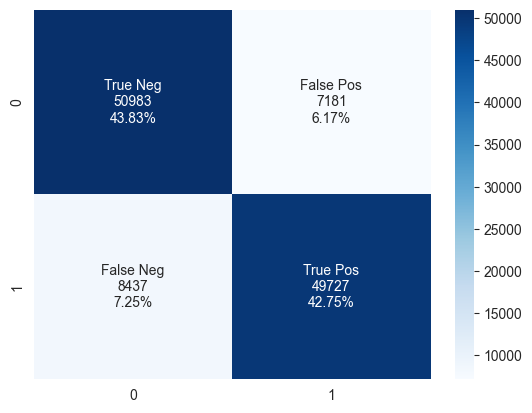

In [67]:
cm = confusion_matrix(y_val_all, y_val_pred_all)
make_confusion_matrix(cm)

In [68]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [69]:
print(classification_report(lr_model.predict(X_test), y_test))
lr_acc_before_feature_selection = accuracy_score(lr_model.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     14295
           1       0.85      0.84      0.84     11018

    accuracy                           0.86     25313
   macro avg       0.86      0.86      0.86     25313
weighted avg       0.86      0.86      0.86     25313



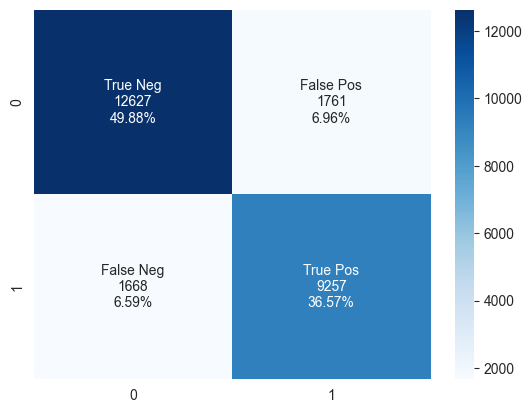

In [70]:
cm = confusion_matrix(y_test, lr_model.predict(X_test))
make_confusion_matrix(cm)

(array([0.        , 0.        , 0.        , ..., 0.99944398, 0.99944398,
        1.        ]),
 array([0.00000000e+00, 9.15331808e-05, 1.33272311e-01, ...,
        9.99725400e-01, 1.00000000e+00, 1.00000000e+00]),
 array([        inf,  5.64499735,  3.66815181, ..., -6.32850491,
        -6.39954677, -9.99319329]))

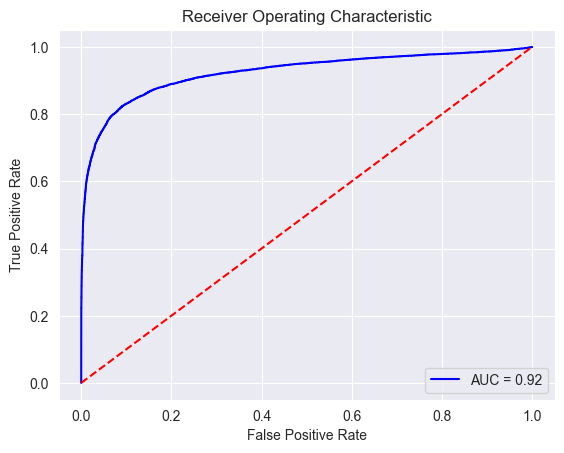

In [71]:
plot_roc_auc(lr_model, X_test, y_test, y_pred=None)

## Model 3: Decision Tree

In [72]:
dt_model = DecisionTreeClassifier()

In [73]:
accuracy_scores = []
y_val_pred_all = []
y_val_all = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    dt_model.fit(X_train_fold, y_train_fold)
    ydt_val_pred = dt_model.predict(X_val_fold)

    y_val_pred_all.extend(ydt_val_pred)
    y_val_all.extend(y_val_fold)

    dtscore = accuracy_score(y_val_fold, ydt_val_pred)
    accuracy_scores.append(dtscore)

In [74]:
avgdt_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the DT model using k-fold cross-validation is: {:.2f}%".format(
    avgdt_accuracy * 100))

The average accuracy of the DT model using k-fold cross-validation is: 95.79%


In [75]:
print(classification_report(y_val_all, y_val_pred_all))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     58164
           1       0.95      0.97      0.96     58164

    accuracy                           0.96    116328
   macro avg       0.96      0.96      0.96    116328
weighted avg       0.96      0.96      0.96    116328



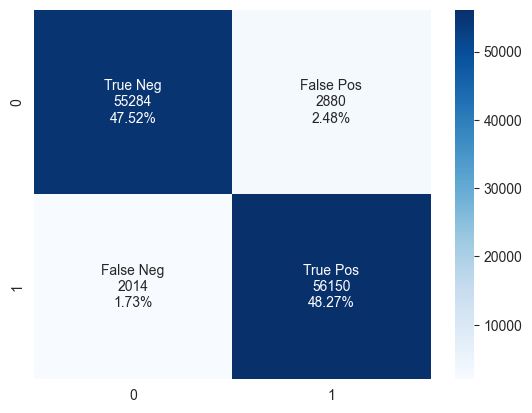

In [76]:
cm = confusion_matrix(y_val_all, y_val_pred_all)
make_confusion_matrix(cm)

In [77]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
print(classification_report(dt_model.predict(X_test), y_test))
dt_acc_before_feature_selection = accuracy_score(dt_model.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14163
           1       0.94      0.92      0.93     11150

    accuracy                           0.94     25313
   macro avg       0.94      0.93      0.94     25313
weighted avg       0.94      0.94      0.94     25313



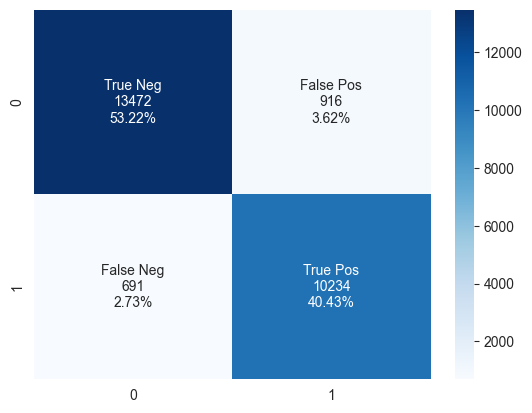

In [79]:
cm = confusion_matrix(y_test, dt_model.predict(X_test))
make_confusion_matrix(cm)

(array([0.        , 0.06366416, 1.        ]),
 array([0.        , 0.93675057, 1.        ]),
 array([inf,  1.,  0.]))

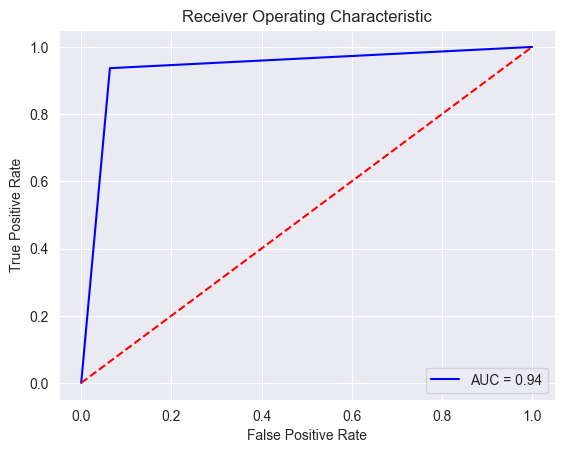

In [80]:
plot_roc_auc(dt_model, X_test, y_test, y_pred=None)

## Model 4: Naive Bayes

In [81]:
nb_model = GaussianNB()

In [82]:
accuracy_scores = []
y_val_pred_all = []
y_val_all = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    nb_model.fit(X_train_fold, y_train_fold)
    ynb_val_pred = nb_model.predict(X_val_fold)

    y_val_pred_all.extend(ynb_val_pred)
    y_val_all.extend(y_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, ynb_val_pred)
    accuracy_scores.append(accuracy_fold)

In [83]:
avgnb_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the Naive Bayes model using k-fold cross-validation is: {:.2f}%".format(
    avgnb_accuracy * 100))

The average accuracy of the Naive Bayes model using k-fold cross-validation is: 84.59%


In [84]:
print(classification_report(y_val_all, y_val_pred_all))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     58164
           1       0.86      0.82      0.84     58164

    accuracy                           0.85    116328
   macro avg       0.85      0.85      0.85    116328
weighted avg       0.85      0.85      0.85    116328



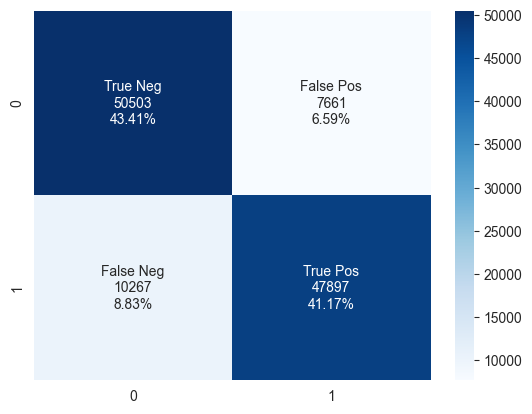

In [85]:
cm = confusion_matrix(y_val_all, y_val_pred_all)
make_confusion_matrix(cm)

In [86]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [87]:
print(classification_report(nb_model.predict(X_test), y_test))
nb_acc_before_feature_selection = accuracy_score(nb_model.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     14681
           1       0.81      0.83      0.82     10632

    accuracy                           0.85     25313
   macro avg       0.84      0.84      0.84     25313
weighted avg       0.85      0.85      0.85     25313



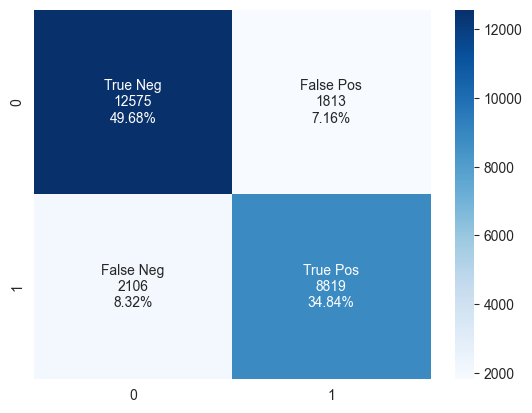

In [88]:
cm = confusion_matrix(y_test, nb_model.predict(X_test))
make_confusion_matrix(cm)

(array([0.        , 0.        , 0.        , ..., 0.99951348, 0.99951348,
        1.        ]),
 array([0.00000000e+00, 9.15331808e-05, 3.30434783e-02, ...,
        9.99908467e-01, 1.00000000e+00, 1.00000000e+00]),
 array([            inf, 1.00000000e+000, 9.99999927e-001, ...,
        5.50860986e-027, 3.30250146e-027, 8.15886676e-110]))

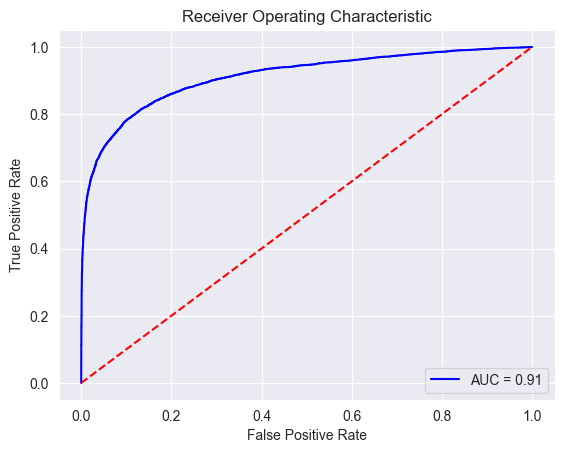

In [89]:
plot_roc_auc(nb_model, X_test, y_test, y_pred=None)

## Model 5: XGBoost Classifier

In [90]:
xgboost_model = XGBClassifier()

In [91]:
accuracy_scores = []
y_val_pred_all = []
y_val_all = []

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    xgboost_model.fit(X_train_fold, y_train_fold)
    yxg_val_pred = xgboost_model.predict(X_val_fold)

    y_val_pred_all.extend(yxg_val_pred)
    y_val_all.extend(y_val_fold)

    xgscore = accuracy_score(y_val_fold, yxg_val_pred)
    accuracy_scores.append(xgscore)

In [92]:
avgXGBoost_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the XGBoost model using k-fold cross-validation is: {:.2f}%".format(
    avgXGBoost_accuracy * 100))

The average accuracy of the XGBoost model using k-fold cross-validation is: 96.34%


In [93]:
print(classification_report(y_val_all, y_val_pred_all))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     58164
           1       0.97      0.95      0.96     58164

    accuracy                           0.96    116328
   macro avg       0.96      0.96      0.96    116328
weighted avg       0.96      0.96      0.96    116328



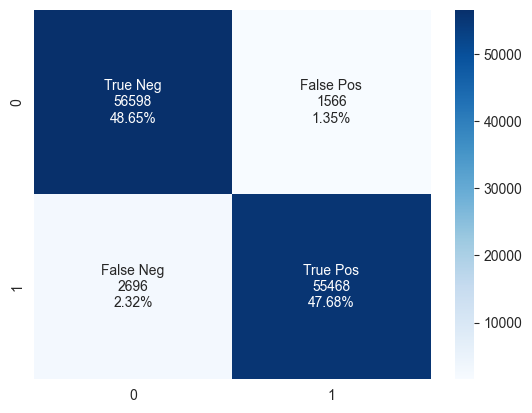

In [94]:
cm = confusion_matrix(y_val_all, y_val_pred_all)
make_confusion_matrix(cm)

In [95]:
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
print(classification_report(xgboost_model.predict(X_test), y_test))
xgboost_acc_before_feature_selection = accuracy_score(xgboost_model.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14627
           1       0.95      0.97      0.96     10686

    accuracy                           0.96     25313
   macro avg       0.96      0.96      0.96     25313
weighted avg       0.96      0.96      0.96     25313



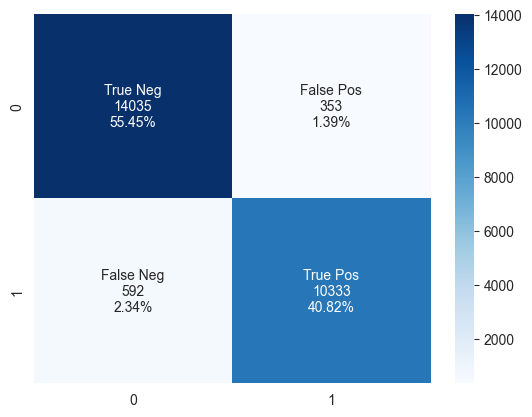

In [97]:
cm = confusion_matrix(y_test, xgboost_model.predict(X_test))
make_confusion_matrix(cm)

(array([0.        , 0.        , 0.        , ..., 0.76348346, 0.76362246,
        1.        ]),
 array([0.00000000e+00, 6.40732265e-04, 1.28146453e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([          inf, 1.0000000e+00, 9.9999988e-01, ..., 1.4174791e-04,
        1.4166387e-04, 2.1244185e-07], dtype=float32))

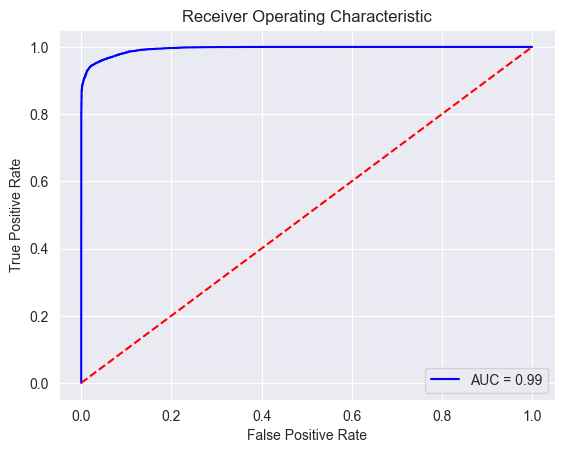

In [98]:
plot_roc_auc(xgboost_model, X_test, y_test, y_pred=None)

## Compare between models

In [99]:
model_accuracies = {}
model_accuracies['KNeighborsClassifier'] = avgknn_accuracy
model_accuracies['LogisticRegression'] = avglr_accuracy
model_accuracies['DecisionTreeClassifier'] = avgdt_accuracy
model_accuracies['Naive Bayes'] = avgnb_accuracy
model_accuracies['XGBoost'] = avgXGBoost_accuracy

In [100]:
results = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Accuracy'])
results = results.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Greens')
results

,Model,Accuracy
4,XGBoost,0.963362
2,DecisionTreeClassifier,0.957929
0,KNeighborsClassifier,0.937590
1,LogisticRegression,0.865742
3,Naive Bayes,0.845884


# Feature Selection

## Univariate feature selection

In [101]:
selector = SelectKBest(chi2, k=21)
X_new_train = selector.fit_transform(X_train, y_train)
X_new_test = selector.fit_transform(X_test, y_test)

X_new_train.shape

(116328, 21)

In [102]:
selected_columns = []
for i, is_selected in enumerate(selector.get_support()):
    if is_selected:
        selected_columns.append(X_train.columns[i])

print("Features are retained:", selected_columns)

Features are retained: ['Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']


### Rebuild Model 

In [103]:
knn_model.fit(X_new_train, y_train)
lr_model.fit(X_new_train, y_train)
dt_model.fit(X_new_train, y_train)
nb_model.fit(X_new_train, y_train)
xgboost_model.fit(X_new_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
knn_acc_after_Univariate = accuracy_score(knn_model.predict(X_new_test), y_test)
lr_acc_after_Univariate = accuracy_score(lr_model.predict(X_new_test), y_test)
dt_acc_after_Univariate = accuracy_score(dt_model.predict(X_new_test), y_test)
nb_acc_after_Univariate = accuracy_score(nb_model.predict(X_new_test), y_test)
xgboost_acc_after_Univariate = accuracy_score(xgboost_model.predict(X_new_test), y_test)

## Eliminate features with low variance

In [105]:
sel = VarianceThreshold()
X_Variance_train = X_train
X_Variance_test = X_test
X_Variance_train = sel.fit_transform(X_Variance_train)
X_Variance_test = sel.fit_transform(X_Variance_test)

In [106]:
selected_features = sel.get_support()
feature_names = X_train.columns 
selected_feature_names = feature_names[selected_features]
print(selected_feature_names)

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Gender_Female',
       'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object', name='Column Name')


### Rebuild Model

In [107]:
knn_model.fit(X_Variance_train, y_train)
lr_model.fit(X_Variance_train, y_train)
dt_model.fit(X_Variance_train, y_train)
nb_model.fit(X_Variance_train, y_train)
xgboost_model.fit(X_Variance_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
knn_acc_after_Variance =    accuracy_score(knn_model.predict(X_Variance_test), y_test)
lr_acc_after_Variance =     accuracy_score(lr_model.predict(X_Variance_test), y_test)
dt_acc_after_Variance =     accuracy_score(dt_model.predict(X_Variance_test), y_test)
nb_acc_after_Variance =     accuracy_score(nb_model.predict(X_Variance_test), y_test)
xgboost_acc_after_Variance =accuracy_score(xgboost_model.predict(X_Variance_test), y_test)

## Tree-based feature selection

In [109]:
clf = ExtraTreesClassifier(n_estimators=20)
clf = clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)
X_tree_based_train = model.transform(X_train)
X_tree_based_test = model.transform(X_test)


In [110]:
selected_features = model.get_support()
importance_scores = clf.feature_importances_
feature_names = X_train.columns

selected_feature_names = feature_names[selected_features]
print(selected_feature_names)

Index(['Inflight wifi service', 'Ease of Online booking', 'Online boarding',
       'Seat comfort', 'Inflight entertainment',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco'],
      dtype='object', name='Column Name')


### Rebuild Model

In [111]:
knn_model.fit(X_tree_based_train, y_train)
lr_model.fit(X_tree_based_train, y_train)
dt_model.fit(X_tree_based_train, y_train)
nb_model.fit(X_tree_based_train, y_train)
xgboost_model.fit(X_tree_based_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
knn_acc_after_tree_base = accuracy_score(knn_model.predict(X_tree_based_test), y_test)
lr_acc_after_tree_base = accuracy_score(lr_model.predict(X_tree_based_test), y_test)
dt_acc_after_tree_basee = accuracy_score(dt_model.predict(X_tree_based_test), y_test)
nb_acc_after_tree_base = accuracy_score(nb_model.predict(X_tree_based_test), y_test)
xgboost_acc_after_tree_base = accuracy_score(xgboost_model.predict(X_tree_based_test), y_test)

## Compare after feature selection

In [113]:
def compare(model, before, Univariate, Variance, Treebase):
    label = ['Before feature selection', 'Univariate feature selection', 'Eliminate features with low variance', 'Tree-based feature selection']
    values = [before, Univariate, Variance, Treebase]

    fig, ax = plt.subplots(figsize=(12, 5))

    color = (random.random(), random.random(), random.random())
    
    ax.bar(label, values, color=color)
    ax.set_title("Model " + model)

    for i in range(len(label)):
        ax.text(i, values[i], str(values[i]), ha='center', va='bottom')

    ax.set_xlabel('Accuracy')
    plt.tight_layout()
    plt.show()

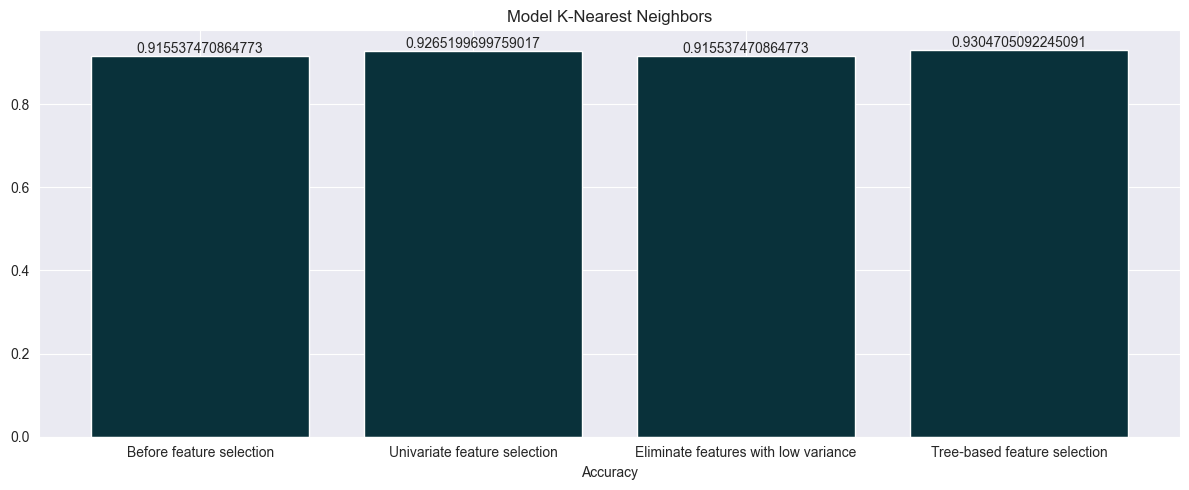

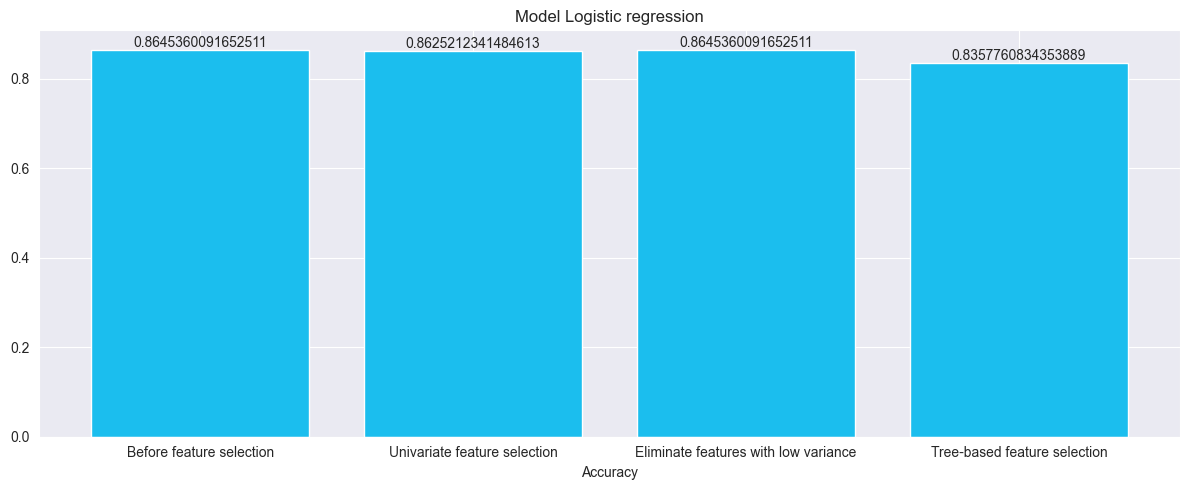

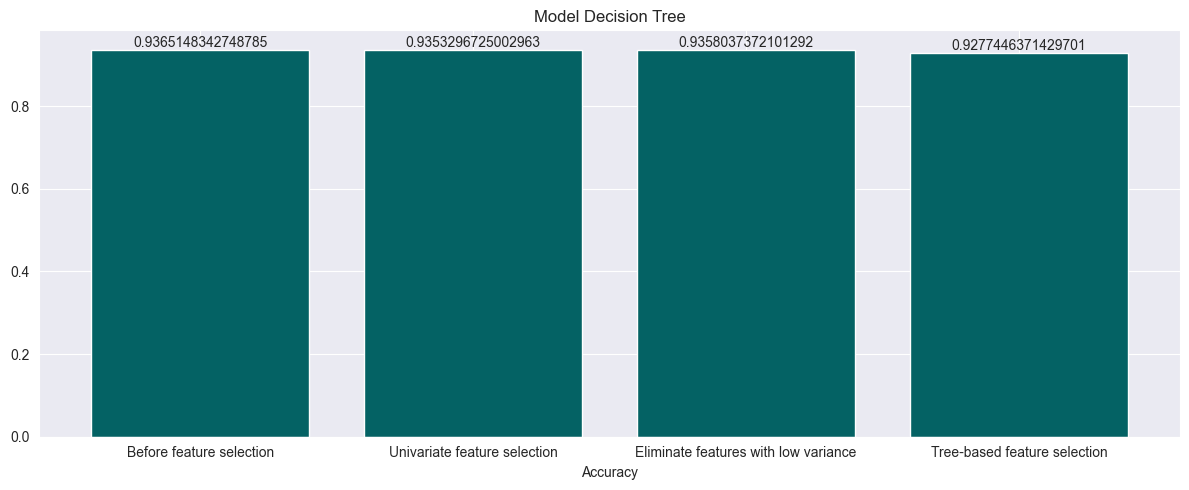

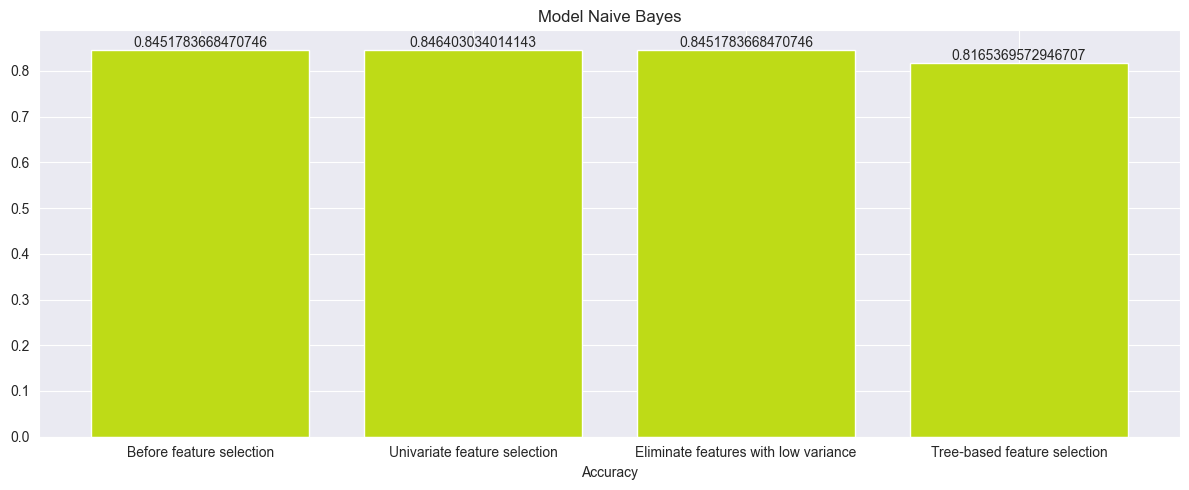

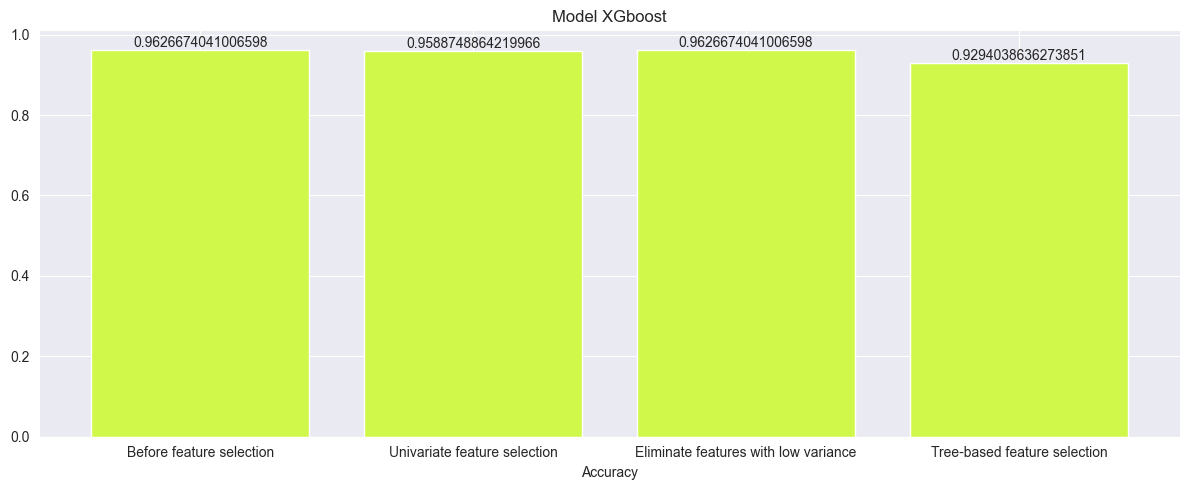

In [114]:
compare("K-Nearest Neighbors",  knn_acc_before_feature_selection,       knn_acc_after_Univariate,       knn_acc_after_Variance,     knn_acc_after_tree_base)
compare("Logistic regression",  lr_acc_before_feature_selection,        lr_acc_after_Univariate,        lr_acc_after_Variance,      lr_acc_after_tree_base)
compare("Decision Tree",        dt_acc_before_feature_selection,        dt_acc_after_Univariate,        dt_acc_after_Variance,      dt_acc_after_tree_basee)
compare("Naive Bayes",          nb_acc_before_feature_selection,        nb_acc_after_Univariate,        nb_acc_after_Variance,      nb_acc_after_tree_base)
compare("XGboost",              xgboost_acc_before_feature_selection,   xgboost_acc_after_Univariate,   xgboost_acc_after_Variance, xgboost_acc_after_tree_base)